In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load data from CSV files
df_2023 = pd.read_csv('final_v2_2023/final_v2_2023.csv')
df_2022 = pd.read_csv('final_v2_2022/final_v2_2022.csv')
df_2021 = pd.read_csv('final_v2_2021/final_v2_2021.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18772\2761508470.py:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18772\2761508470.py:3: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18772\2761508470.py:4: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [10]:
# Clean Data: Standardize the Gender column by removing single quotes and whitespaces
df_2023['Gender_from_bert'] = df_2023['Gender_from_bert'].str.replace("'", "").str.strip()

# Shorten specific long names in the 'Nature_of_Payment_or_Transfer_of_Value' column
df_2023['Nature_of_Payment_or_Transfer_of_Value'] = df_2023['Nature_of_Payment_or_Transfer_of_Value'].replace(
    {
        'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program': 'Other_services',
        'Compensation for serving as faculty or as a speaker for a medical education program': 'faculty_speaker_ed_prog'
    }
)

# Normalize the company names by converting to uppercase, removing extra spaces, and stripping any leading/trailing spaces
df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] \
    .str.upper() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.strip()

# Consolidate all companies that contain the keyword 'ABBVIE' into a single label 'ABBVIE INC.'
df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].apply(
    lambda x: 'ABBVIE INC.' if 'ABBVIE' in x else x
)

# # Clean Data: Standardize the Gender column by removing single quotes and whitespaces
df_2022['Gender_from_bert'] = df_2022['Gender_from_bert'].str.replace("'", "").str.strip()

# Shorten specific long names in the 'Nature_of_Payment_or_Transfer_of_Value' column
df_2022['Nature_of_Payment_or_Transfer_of_Value'] = df_2022['Nature_of_Payment_or_Transfer_of_Value'].replace(
    {
        'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program': 'Other_services',
        'Compensation for serving as faculty or as a speaker for a medical education program': 'faculty_speaker_ed_prog'
    }
)

# Normalize the company names by converting to uppercase, removing extra spaces, and stripping any leading/trailing spaces
df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] \
    .str.upper() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.strip()

# Consolidate all companies that contain the keyword 'ABBVIE' into a single label 'ABBVIE INC.'
df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].apply(
    lambda x: 'ABBVIE INC.' if 'ABBVIE' in x else x
)

# # Clean Data: Standardize the Gender column by removing single quotes and whitespaces
df_2021['Gender_from_bert'] = df_2021['Gender_from_bert'].str.replace("'", "").str.strip()

# Shorten specific long names in the 'Nature_of_Payment_or_Transfer_of_Value' column
df_2021['Nature_of_Payment_or_Transfer_of_Value'] = df_2021['Nature_of_Payment_or_Transfer_of_Value'].replace(
    {
        'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program': 'Other_services',
        'Compensation for serving as faculty or as a speaker for a medical education program': 'faculty_speaker_ed_prog'
    }
)

# Normalize the company names by converting to uppercase, removing extra spaces, and stripping any leading/trailing spaces
df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] \
    .str.upper() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.strip()

# Consolidate all companies that contain the keyword 'ABBVIE' into a single label 'ABBVIE INC.'
df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].apply(
    lambda x: 'ABBVIE INC.' if 'ABBVIE' in x else x
)

In [34]:
def remove_nan_nan_rows(dataframes, name_col='Full_Name'):
    """
    Removes rows from a list of dataframes where the specified column has the value 'Nan Nan'.

    Parameters:
    - dataframes (list): List of pandas DataFrames to process.
    - name_col (str): The column to check for 'Nan Nan' values (default: 'Full_Name').

    Returns:
    - list: List of cleaned pandas DataFrames.
    """
    cleaned_dataframes = []
    for df in dataframes:
        cleaned_df = df[df[name_col] != 'Nan Nan']  # Filter out rows with 'Nan Nan' in the specified column
        cleaned_dataframes.append(cleaned_df)
    return cleaned_dataframes

# Example list of dataframes
dataframes = [df_2021, df_2022, df_2023]

# Call the function to clean the dataframes
cleaned_dataframes = remove_nan_nan_rows(dataframes, name_col='Full_Name')

# Assign the cleaned dataframes back to their respective variables
df_2021, df_2022, df_2023 = cleaned_dataframes

In [15]:
df_2022.head()

Covered_Recipient_Type  Teaching_Hospital_ID Teaching_Hospital_Name  \
0  Covered Recipient Physician                   NaN                    NaN   
1  Covered Recipient Physician                   NaN                    NaN   
2  Covered Recipient Physician                   NaN                    NaN   
3  Covered Recipient Physician                   NaN                    NaN   
4  Covered Recipient Physician                   NaN                    NaN   

  Recipient_State Covered_Recipient_Primary_Type_1  \
0              NY                   Medical Doctor   
1              FL                   Medical Doctor   
2              FL                   Medical Doctor   
3              FL                   Medical Doctor   
4              FL                   Medical Doctor   

                       Covered_Recipient_Specialty_1  \
0  Allopathic & Osteopathic Physicians|Ophthalmology   
1  Allopathic & Osteopathic Physicians|Ophthalmology   
2  Allopathic & Osteopathic Physicians|Ophthalmology   
3  Allopathic & Osteopathic Physicians|Ophthalmology   
4  Allopathic & Osteopathic Physicians|Ophthalmology   

  Covered_Recipient_License_State_code1  \
0                                    NY   
1                                    FL   
2                                    FL   
3                                    FL   
4                                    FL   

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  \
0                        AERIE PHARMACEUTICALS, INC.              
1                        AERIE PHARMACEUTICALS, INC.              
2                        AERIE PHARMACEUTICALS, INC.              
3                        AERIE PHARMACEUTICALS, INC.              
4                        AERIE PHARMACEUTICALS, INC.              

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  \
0                                                 NC               
1                                                 NC               
2                                                 NC               
3                                                 NC               
4                                                 NC               

   Total_Amount_of_Payment_USDollars Date_of_Payment  \
0                               4.34      12/17/2021   
1                              96.80      10/13/2021   
2                             225.87      10/21/2021   
3                             250.37      10/21/2021   
4                             403.01      10/21/2021   

  Form_of_Payment_or_Transfer_of_Value Nature_of_Payment_or_Transfer_of_Value  \
0           In-kind items and services                      Food and Beverage   
1           In-kind items and services                     Travel and Lodging   
2           In-kind items and services                     Travel and Lodging   
3           In-kind items and services                     Travel and Lodging   
4           In-kind items and services                     Travel and Lodging   

           Full_Name Gender_from_bert  
0       Jon L. Dusse           'Male'  
1  Analisa Arosemena         'Female'  
2  Analisa Arosemena         'Female'  
3  Analisa Arosemena         'Female'  
4  Analisa Arosemena         'Female'

In [36]:
import pandas as pd
import plotly.express as px

def visualize_gender_payment_gap_with_gender_counts(dataframes, year_labels, nature_col, gender_col, payment_col):
    """
    Creates a line chart to visualize the gender payment gap across years,
    including the number of males and females directly on the dots.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of year labels corresponding to the dataframes.
    - nature_col (str): Column name for the nature of payment.
    - gender_col (str): Column name for gender.
    - payment_col (str): Column name for payment amounts.

    Returns:
    - None: Displays an interactive line chart with gender payment gaps and counts.
    """
    combined_data = []

    for df, year in zip(dataframes, year_labels):
        # Group by nature of payment and gender to calculate the median amount paid
        payment_gender_gap_median = df.groupby([nature_col, gender_col])[payment_col].median().unstack()

        # Replace NaN values with 0 to avoid division by zero issues
        payment_gender_gap_median = payment_gender_gap_median.fillna(0)

        # Calculate the gender payment gap as a percentage of female to male median payments for each payment type
        payment_gender_gap_median['Female_to_Male_%'] = payment_gender_gap_median.apply(
            lambda row: (row["Female"] / row["Male"] * 100) if row["Male"] > 0 else 0, axis=1
        )

        # Count the number of males and females for each nature of payment
        gender_counts = df.groupby([nature_col, gender_col])[gender_col].count().unstack().fillna(0)

        # Add year and gender counts information
        payment_gender_gap_median['Year'] = year
        payment_gender_gap_median['Male_Count'] = gender_counts["Male"] if "Male" in gender_counts else 0
        payment_gender_gap_median['Female_Count'] = gender_counts["Female"] if "Female" in gender_counts else 0
        payment_gender_gap_median['Gender_Counts'] = payment_gender_gap_median.apply(
            lambda row: f"M: {int(row['Male_Count'])}, F: {int(row['Female_Count'])}", axis=1
        )  # Combine counts into a single text field
        payment_gender_gap_median.reset_index(inplace=True)

        # Append to the combined data list
        combined_data.append(payment_gender_gap_median)

    # Combine all years into a single DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)

    # Create a line chart with Plotly
    fig = px.line(
        combined_df,
        x='Year',
        y='Female_to_Male_%',
        color=nature_col,
        markers=True,
        title='Gender Payment Gap (Female to Male %) Across Years',
        labels={'Female_to_Male_%': 'Female to Male Payment (%)', 'Year': 'Year'},
        text='Gender_Counts'  # Add text labels to the data points
    )

    # Add a horizontal line indicating equal pay
    fig.add_shape(
        type='line',
        x0=min(year_labels),
        x1=max(year_labels),
        y0=100,
        y1=100,
        line=dict(color='red', dash='dash'),
        name='Equal Pay Line'
    )

    # Update text annotations
    fig.update_traces(
        textposition='top center',  # Position the text above the markers
        textfont=dict(size=10)  # Customize text font size
    )

    # Update layout
    fig.update_layout(
        width=1200,
        height=600,
        xaxis_title='Year',
        yaxis_title='Female to Male Payment (%)',
        template='plotly_white',
        legend=dict(
            y=0.5,
            yanchor='middle',
            x=1.05,
            xanchor='left',
            itemsizing='constant',
            itemwidth=50,
            traceorder='normal',
            font=dict(size=10)
        ),
        margin=dict(l=50, r=200, t=50, b=50)
    )

    # Show the chart
    fig.show()


# Example usage
visualize_gender_payment_gap_with_gender_counts(
    dataframes=[df_2021, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    nature_col='Nature_of_Payment_or_Transfer_of_Value',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars'
)


In [70]:
import plotly.express as px
import pandas as pd

def plot_top_companies_line_chart_plotly(dataframes, year_labels, company_col, payment_col, top_n=20):
    """
    Plots an interactive line chart showing total payment trends for the top N companies across multiple years.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
    - company_col (str): Column name for company names.
    - payment_col (str): Column name for payment amounts.
    - top_n (int): Number of top companies to display based on total payments in the first year.

    Returns:
    - None: Displays the interactive line chart.
    """
    # Check if inputs are valid
    if len(dataframes) != len(year_labels):
        raise ValueError("Number of dataframes and year labels must match.")
    
    # Calculate total payments for each company in the first year to identify the top N companies
    first_year_df = dataframes[0]
    top_companies = (
        first_year_df.groupby(company_col)[payment_col].sum()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )
    
    # Create a combined dataframe with year-wise data for the top companies
    combined_data = []
    for df, year in zip(dataframes, year_labels):
        # Group by company and sum payments
        yearly_totals = df.groupby(company_col)[payment_col].sum()

        # Ensure all top companies are present; fill missing ones with 0
        for company in top_companies:
            combined_data.append({
                'Year': year,
                company_col: company,
                payment_col: yearly_totals.get(company, 0)  # Use 0 if company data is missing
            })
    
    # Convert the combined data into a DataFrame
    combined_df = pd.DataFrame(combined_data)

    # Convert payment amounts to millions for better readability
    combined_df[payment_col] = combined_df[payment_col] / 1_000_000

    # Create the Plotly line chart
    fig = px.line(
        combined_df,
        x="Year",
        y=payment_col,
        color=company_col,
        title=f"Top {top_n} Companies by Payment Trends Across Years",
        labels={payment_col: "Total Payment Amount (USD) in Millions"},
        markers=True
    )
    
    # Customize layout
    fig.update_layout(
        width=1000,
        height=700,
        xaxis_title="Year",
        yaxis_title="Total Payment Amount (USD) in Millions",
        legend_title="Company",
        template="plotly_white",
        title=dict(font=dict(size=20))
    )
    
    # Show the chart
    fig.show()


In [73]:
# Call the function to visualize
plot_top_companies_line_chart_plotly(
    dataframes=[df_2021, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    company_col='Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
    payment_col='Total_Amount_of_Payment_USDollars',
    top_n=20
)

In [76]:
import plotly.express as px
import pandas as pd
 
def plot_payment_trends_for_abbvie(
    dataframes, year_labels, recipient_type, primary_type, gender_col, payment_col, nature_col
):
    """
    Plots interactive line charts for each Nature of Payment, showing gender-wise payment trends 
    for AbbVie Inc., filtered by Covered_Recipient_Type and Covered_Recipient_Primary_Type_1 across years.
 
    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
    - recipient_type (str): The Covered_Recipient_Type to filter (e.g., 'Covered Recipient Physician').
    - primary_type (str): The Covered_Recipient_Primary_Type_1 to filter (e.g., 'Medical Doctor').
    - gender_col (str): Column name for gender.
    - payment_col (str): Column name for payment amounts.
    - nature_col (str): Column name for the nature of payments.
 
    Returns:
    - None: Displays multiple interactive line charts (one for each nature of payment).
    """
    company_name = "ABBVIE INC."  # Specify the company name to filter
 
    # Get the list of unique Nature of Payments from all dataframes
    all_nature_values = set()
    for df in dataframes:
        all_nature_values.update(df[nature_col].unique())
    all_nature_values = sorted(all_nature_values)
 
    # Iterate over each Nature of Payment to create separate charts
    for nature in all_nature_values:
        combined_data = []
        gender_counts_by_year = {}  # Store gender counts for annotations
 
        for df, year in zip(dataframes, year_labels):
            # Filter data for AbbVie, specific recipient and primary type, and nature of payment
            filtered_df = df[
                (df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] == company_name) &
                (df['Covered_Recipient_Type'] == recipient_type) &
                (df['Covered_Recipient_Primary_Type_1'] == primary_type) &
                (df[nature_col] == nature) &
                (df[gender_col].isin(['Male', 'Female']))
            ]
            # Group by gender and sum payments
            gender_payment = filtered_df.groupby(gender_col)[payment_col].sum()
 
            # Count the number of males and females for the year
            gender_counts = filtered_df[gender_col].value_counts().to_dict()
            gender_counts_by_year[year] = {
                'Males': gender_counts.get("Male", 0),
                'Females': gender_counts.get("Female", 0)
            }
 
            # Append data for plotting
            for gender in ['Male', 'Female']:
                combined_data.append({
                    'Year': year,
                    'Gender': gender,
                    'Total Payment Amount (USD)': gender_payment.get(gender, 0) / 1_000_000,  # Convert to millions
                    'Nature of Payment': nature
                })
 
        # Convert combined data to a DataFrame
        trend_df = pd.DataFrame(combined_data)
 
        # Create an interactive line chart with Plotly
        fig = px.line(
            trend_df,
            x='Year',
            y='Total Payment Amount (USD)',
            color='Gender',
            markers=True,
            title=f'Payment Trends for "{nature}" (AbbVie, Role: {primary_type}, Type: {recipient_type})',
            labels={'Total Payment Amount (USD)': 'Total Payment (Millions)'},
            color_discrete_map={'Male': 'red', 'Female': 'blue'} 
        )
 
        # Add annotations for gender counts
        annotations = []
        for year, counts in gender_counts_by_year.items():
            annotations.append(
                dict(
                    x=year,
                    y=0,  # Position the annotation below the x-axis
                    text=f"Males: {counts['Males']}, Females: {counts['Females']}",
                    showarrow=False,
                    font=dict(size=12, color="black"),
                    xanchor='center',
                    yanchor='top',
                )
            )
 
        # Update layout with annotations
        fig.update_layout(
            annotations=annotations,
            title=dict(font=dict(size=20)),
            xaxis_title='Year',
            yaxis_title='Total Payment Amount (USD) in Millions',
            legend_title='Gender',
            template='plotly_white'
        )
 
        # Show the chart
        fig.show()

In [77]:
plot_payment_trends_for_abbvie(
    dataframes=[df_2021, df_2022, df_2023],  # List of DataFrames for each year
    year_labels=[2021, 2022, 2023],          # Year labels
    recipient_type='Covered Recipient Physician',  # Specify Covered_Recipient_Type
    primary_type='Medical Doctor',           # Specify the primary type (e.g., "Medical Doctor")
    gender_col='Gender_from_bert',           # Column for gender
    payment_col='Total_Amount_of_Payment_USDollars',  # Column for payment amounts
    nature_col='Nature_of_Payment_or_Transfer_of_Value'  # Column for nature of payments
)

In [87]:
import plotly.express as px
import pandas as pd
 
def plot_payment_trends_by_nature_and_form(dataframes, year_labels, recipient_type, primary_type, gender_col, payment_col, nature_col, form_col, selected_nature):
    """
    Plots interactive line charts showing gender-wise payment trends for a 
    specific Nature of Payment, breaking down by Form of Payment across years,
    and filters for AbbVie Inc.
 
    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
    - recipient_type (str): The Covered Recipient Type to filter (e.g., 'Covered Recipient Physician').
    - primary_type (str): The specific Covered_Recipient_Primary_Type_1 to filter (e.g., 'Medical Doctor').
    - gender_col (str): Column name for gender.
    - payment_col (str): Column name for payment amounts.
    - nature_col (str): Column name for the nature of payments.
    - form_col (str): Column name for the form of payment.
    - selected_nature (str): The specific Nature of Payment to focus on.
 
    Returns:
    - None: Displays an interactive line chart for each Form of Payment.
    """
    # Hardcoded company name
    company_name = "ABBVIE INC."
    company_col = "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"
 
    # Get the list of unique Form of Payments
    all_form_values = set()
    for df in dataframes:
        all_form_values.update(df[form_col].unique())
    all_form_values = sorted(all_form_values)
 
    # Loop through each form of payment
    for form in all_form_values:
        combined_data = []
        gender_counts_by_year = {}  # Store gender counts for annotations
 
        for df, year in zip(dataframes, year_labels):
            # Filter data by recipient type, primary type, specific nature of payment, form of payment, and hardcoded company
            filtered_df = df[
                (df['Covered_Recipient_Type'] == recipient_type) &
                (df['Covered_Recipient_Primary_Type_1'] == primary_type) &
                (df[company_col] == company_name) &  # Hardcoded AbbVie Inc.
                (df[nature_col] == selected_nature) &
                (df[form_col] == form) &
                (df[gender_col].isin(['Male', 'Female']))
            ]
 
            # If no data for this combination, add a row with 0 payments
            if filtered_df.empty:
                filtered_df = pd.DataFrame({
                    gender_col: ['Male', 'Female'],
                    payment_col: [0, 0],
                    'Year': [year, year],
                    form_col: [form, form]
                })
            # Group by gender and sum payments
            grouped_data = filtered_df.groupby([gender_col])[payment_col].sum().reset_index()
 
            # Add year information
            grouped_data['Year'] = year
            grouped_data[form_col] = form  # Add form column to data for later grouping
            combined_data.append(grouped_data)
 
            # Count the number of males and females for the year
            gender_counts = filtered_df[gender_col].value_counts().to_dict()
            gender_counts_by_year[year] = {
                'Males': gender_counts.get("Male", 0),
                'Females': gender_counts.get("Female", 0)
            }
 
        # Combine data from all years for the current form of payment
        trend_df = pd.concat(combined_data, ignore_index=True)
 
        # Debugging: Print out the combined data to see what is being plotted
        print(f"Data for Form: {form}")
        print(trend_df)
 
        # Create an interactive line chart with Plotly
        fig = px.line(
            trend_df,
            x='Year',
            y=payment_col,
            color=gender_col,  # Color by gender
            markers=True,
            title=f"Payment Trends for '{selected_nature}' by AbbVie Inc. - Form: '{form}' (Role: {primary_type})",
            color_discrete_map={'Male': 'red', 'Female': 'blue'},
            labels={
                payment_col: 'Total Payment Amount (USD)',
                form_col: 'Form of Payment',
                gender_col: 'Gender',
                'Year': 'Year'
            }
        )
 
        # Add annotations for gender counts
        annotations = []
        for year, counts in gender_counts_by_year.items():
            annotations.append(
                dict(
                    x=year,
                    y=0,  # Position the annotation below the x-axis
                    text=f"Males: {counts['Males']}, Females: {counts['Females']}",
                    showarrow=False,
                    font=dict(size=12, color="black"),
                    xanchor='center',
                    yanchor='top',
                )
            )
 
        # Update layout with annotations
        fig.update_layout(
            annotations=annotations,
            title=dict(font=dict(size=20)),
            xaxis_title='Year',
            yaxis_title='Total Payment Amount (USD)',
            legend_title='Gender',
            template='plotly_white'
        )
 
        # Show the chart for the current form of payment
        fig.show()

In [88]:
plot_payment_trends_by_nature_and_form(
    dataframes=[df_2021, df_2022, df_2023],  # List of DataFrames for each year
    year_labels=[2021, 2022, 2023],          # Year labels
    recipient_type='Covered Recipient Physician',  # Filter for physicians
    primary_type='Medical Doctor',           # Specify the primary type (e.g., "Medical Doctor")
    gender_col='Gender_from_bert',           # Column for gender
    payment_col='Total_Amount_of_Payment_USDollars',  # Column for payment amounts
    nature_col='Nature_of_Payment_or_Transfer_of_Value',  # Column for nature of payments
    form_col='Form_of_Payment_or_Transfer_of_Value',      # Column for form of payment
    selected_nature='Acquisitions'         # Focus on a specific nature of payment
)

Data for Form: Any other ownership interest
  Gender_from_bert  Total_Amount_of_Payment_USDollars  Year  \
0           Female                                  0  2021   
1             Male                                  0  2021   
2           Female                                  0  2022   
3             Male                                  0  2022   
4           Female                                  0  2023   
5             Male                                  0  2023   

  Form_of_Payment_or_Transfer_of_Value  
0         Any other ownership interest  
1         Any other ownership interest  
2         Any other ownership interest  
3         Any other ownership interest  
4         Any other ownership interest  
5         Any other ownership interest  


Data for Form: Cash or cash equivalent
  Gender_from_bert  Total_Amount_of_Payment_USDollars  Year  \
0           Female                               0.00  2021   
1             Male                               0.00  2021   
2           Female                               0.00  2022   
3             Male                               0.00  2022   
4             Male                          428472.45  2023   

  Form_of_Payment_or_Transfer_of_Value  
0              Cash or cash equivalent  
1              Cash or cash equivalent  
2              Cash or cash equivalent  
3              Cash or cash equivalent  
4              Cash or cash equivalent  


Data for Form: Dividend, profit or other return on investment
  Gender_from_bert  Total_Amount_of_Payment_USDollars  Year  \
0             Male                        21415038.03  2021   
1           Female                               0.00  2022   
2             Male                               0.00  2022   
3           Female                               0.00  2023   
4             Male                               0.00  2023   

             Form_of_Payment_or_Transfer_of_Value  
0  Dividend, profit or other return on investment  
1  Dividend, profit or other return on investment  
2  Dividend, profit or other return on investment  
3  Dividend, profit or other return on investment  
4  Dividend, profit or other return on investment  


Data for Form: In-kind items and services
  Gender_from_bert  Total_Amount_of_Payment_USDollars  Year  \
0           Female                                  0  2021   
1             Male                                  0  2021   
2           Female                                  0  2022   
3             Male                                  0  2022   
4           Female                                  0  2023   
5             Male                                  0  2023   

  Form_of_Payment_or_Transfer_of_Value  
0           In-kind items and services  
1           In-kind items and services  
2           In-kind items and services  
3           In-kind items and services  
4           In-kind items and services  
5           In-kind items and services  


Data for Form: Stock
  Gender_from_bert  Total_Amount_of_Payment_USDollars  Year  \
0           Female                                  0  2021   
1             Male                                  0  2021   
2           Female                                  0  2022   
3             Male                                  0  2022   
4           Female                                  0  2023   
5             Male                                  0  2023   

  Form_of_Payment_or_Transfer_of_Value  
0                                Stock  
1                                Stock  
2                                Stock  
3                                Stock  
4                                Stock  
5                                Stock  


Data for Form: Stock option
  Gender_from_bert  Total_Amount_of_Payment_USDollars  Year  \
0           Female                                  0  2021   
1             Male                                  0  2021   
2           Female                                  0  2022   
3             Male                                  0  2022   
4           Female                                  0  2023   
5             Male                                  0  2023   

  Form_of_Payment_or_Transfer_of_Value  
0                         Stock option  
1                         Stock option  
2                         Stock option  
3                         Stock option  
4                         Stock option  
5                         Stock option  


In [39]:
import pandas as pd
import plotly.express as px

def visualize_male_vs_female_counts(dataframes, year_labels, gender_col):
    """
    Creates a grouped bar chart to visualize the Male vs Female counts across years.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of year labels corresponding to the dataframes.
    - gender_col (str): Column name for gender.

    Returns:
    - None: Displays an interactive grouped bar chart.
    """
    combined_data = []

    for df, year in zip(dataframes, year_labels):
        # Count the number of males and females for the year
        gender_counts = df[gender_col].value_counts()
        combined_data.append({
            'Year': year,
            'Male': gender_counts.get('Male', 0),
            'Female': gender_counts.get('Female', 0)
        })

    # Convert combined data into a DataFrame
    combined_df = pd.DataFrame(combined_data)

    # Melt the DataFrame to long format for Plotly
    melted_df = combined_df.melt(id_vars=['Year'], value_vars=['Male', 'Female'], var_name='Gender', value_name='Count')

    # Create a line chart
    fig = px.line(
        melted_df,
        x='Year',
        y='Count',
        color='Gender',
        markers=True,
        title='Male vs Female Counts Across Years',
        labels={'Count': 'Number of Recipients', 'Year': 'Year'}
    )


    # Update layout for better visibility
    fig.update_layout(
        width=800,
        height=500,
        xaxis_title='Year',
        yaxis_title='Number of Recipients',
        template='plotly_white',
        legend=dict(
            title='Gender',
            x=1.05,
            y=1,
            xanchor='left',
            yanchor='top',
            font=dict(size=10)
        )
    )

    # Show the chart
    fig.show()

# Example list of dataframes and corresponding years
dataframes = [df_2021, df_2022, df_2023]
year_labels = [2021, 2022, 2023]

# Call the function
visualize_male_vs_female_counts(dataframes, year_labels, gender_col='Gender_from_bert')


In [43]:
import pandas as pd
import plotly.express as px

def total_payment_by_recipient_type_across_years(dataframes, year_labels, recipient_col='Covered_Recipient_Type', payment_col='Total_Amount_of_Payment_USDollars'):
    """
    Calculates and visualizes the total amount of payment for different covered recipient types across years.

    Parameters:
    - dataframes (list): List of pandas DataFrames to process.
    - year_labels (list): List of year labels corresponding to the dataframes.
    - recipient_col (str): Column name for recipient types.
    - payment_col (str): Column name for payment amounts.

    Returns:
    - None: Displays an interactive bar chart.
    """
    combined_data = []

    for df, year in zip(dataframes, year_labels):
        # Group by recipient type and sum payments for the year
        recipient_payment = df.groupby(recipient_col)[payment_col].sum().reset_index()
        recipient_payment['Year'] = year  # Add year information
        combined_data.append(recipient_payment)

    # Combine all year data into a single DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)

    # Create a bar chart with Plotly
    fig = px.bar(
        combined_df,
        x='Year',
        y=payment_col,
        color=recipient_col,
        barmode='group',
        title='Total Payments by Covered Recipient Types Across Years',
        labels={payment_col: 'Total Payment Amount (USD)', 'Year': 'Year'},
    )

    # Update layout for better visualization
    fig.update_layout(
        width=1000,
        height=600,
        xaxis_title='Year',
        yaxis_title='Total Payment Amount (USD)',
        template='plotly_white',
        legend=dict(
            title='Recipient Type',
            x=1.05,
            y=1,
            xanchor='left',
            yanchor='top',
            font=dict(size=10)
        )
    )

    # Show the chart
    fig.show()

# Example Usage
# Assuming df_2021, df_2022, and df_2023 are your DataFrames
dataframes = [df_2021, df_2022, df_2023]
year_labels = [2021, 2022, 2023]

# Call the function
total_payment_by_recipient_type_across_years(dataframes, year_labels)


In [59]:
import pandas as pd
import plotly.express as px

def visualize_payment_by_form_across_years(dataframes, year_labels, form_col='Form_of_Payment_or_Transfer_of_Value', payment_col='Total_Amount_of_Payment_USDollars'):
    """
    Calculates and visualizes the total amount of payment for different forms of payment across years.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of year labels corresponding to the dataframes.
    - form_col (str): Column name for the form of payment.
    - payment_col (str): Column name for payment amounts.

    Returns:
    - None: Displays an interactive grouped bar chart.
    """
    combined_data = []

    for df, year in zip(dataframes, year_labels):
        # Group by form of payment and sum payments for the year
        form_payment = df.groupby(form_col)[payment_col].sum().reset_index()
        form_payment['Year'] = year  # Add year information
        combined_data.append(form_payment)

    # Combine all year data into a single DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)

    # Create a grouped bar chart with Plotly
    fig = px.bar(
        combined_df,
        x='Year',
        y=payment_col,
        color=form_col,
        barmode='group',
        title='Total Payments by Form of Payment Across Years',
        labels={payment_col: 'Total Payment Amount (USD)', 'Year': 'Year', form_col: 'Form of Payment'},
    )

    # Update layout for better visualization
    fig.update_layout(
        width=1000,
        height=600,
        xaxis_title='Year',
        yaxis_title='Total Payment Amount (USD)',
        template='plotly_white',
        legend=dict(
            title='Form of Payment',
            x=1.05,
            y=1,
            xanchor='left',
            yanchor='top',
            font=dict(size=10)
        )
    )

    # Show the chart
    fig.show()


In [60]:
# Example list of dataframes and corresponding years
dataframes = [df_2021, df_2022, df_2023]
year_labels = [2021, 2022, 2023]

# Call the function to visualize total payments by form across years
visualize_payment_by_form_across_years(dataframes, year_labels)


In [40]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

def plot_line_charts_by_payment_nature_plotly(dataframes, year_labels, recipient_type, gender_col, payment_col, nature_col):
    """
    Plots multiple interactive line charts for each unique value of `nature_col` 
    showing gender-wise payment trends across years using Plotly.
    Includes a separate label section indicating the number of males and females for each year.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
    - recipient_type (str): The recipient type to filter the data (e.g., 'Covered Recipient Physician').
    - gender_col (str): Column name for gender.
    - payment_col (str): Column name for payment amounts.
    - nature_col (str): Column name for the nature of payments.

    Returns:
    - None: Displays multiple interactive line charts.
    """
    # Get the list of unique Nature of Payments from all dataframes
    all_nature_values = set()
    for df in dataframes:
        all_nature_values.update(df[nature_col].unique())
    all_nature_values = sorted(all_nature_values)

    # Get the list of unique genders from all dataframes
    all_genders = set()
    for df in dataframes:
        all_genders.update(df[gender_col].unique())

    # Filter data and group for each nature of payment
    for nature in all_nature_values:
        combined_data = []
        gender_counts_by_year = {}  # Store gender counts for annotations

        for df, year in zip(dataframes, year_labels):
            # Filter data by recipient type and nature of payment
            filtered_df = df[(df['Covered_Recipient_Type'] == recipient_type) & (df[nature_col] == nature)]
            
            # Group by gender and sum payments
            gender_payment = filtered_df.groupby(gender_col)[payment_col].sum()

            # Count the number of males and females for the year
            gender_counts = filtered_df[gender_col].value_counts().to_dict()
            gender_counts_by_year[year] = {
                'Males': gender_counts.get("Male", 0),
                'Females': gender_counts.get("Female", 0)
            }

            # Ensure all genders are present, fill missing ones with 0
            for gender in all_genders:
                combined_data.append({
                    'Year': year,
                    'Gender': gender,
                    'Total Payment Amount (USD)': gender_payment.get(gender, 0) / 1_000_000,  # Convert to millions
                    'Nature of Payment': nature
                })
        
        # Convert combined data to a DataFrame
        trend_df = pd.DataFrame(combined_data)

        # Create an interactive line chart with Plotly
        fig = px.line(
            trend_df,
            x='Year',
            y='Total Payment Amount (USD)',
            color='Gender',
            markers=True,
            title=f'Gender-wise Payment Trends for "{nature}"',
            labels={'Total Payment Amount (USD)': 'Total Payment (Millions)'},
        )

        # Add a separate label section showing male and female counts for each year
        annotations = []
        for year, counts in gender_counts_by_year.items():
            annotations.append(
                dict(
                    x=year,
                    y=0,  # Position the annotation below the x-axis
                    text=f"Males: {counts['Males']}, Females: {counts['Females']}",
                    showarrow=False,
                    font=dict(size=12, color="black"),
                    xanchor='center',
                    yanchor='top',
                )
            )
        
        # Add annotations to the layout
        fig.update_layout(
            annotations=annotations,
            title=dict(font=dict(size=20)),
            xaxis_title='Year',
            yaxis_title='Total Payment Amount (USD) in Millions',
            legend_title='Gender',
            template='plotly_white'
        )
        
        # Show the chart
        fig.show()


In [25]:
df_2022.head()

Covered_Recipient_Type  Teaching_Hospital_ID  \
0  Covered Recipient Non-Physician Practitioner                   NaN   
1  Covered Recipient Non-Physician Practitioner                   NaN   
2  Covered Recipient Non-Physician Practitioner                   NaN   
3  Covered Recipient Non-Physician Practitioner                   NaN   
4  Covered Recipient Non-Physician Practitioner                   NaN   

  Teaching_Hospital_Name Recipient_State Covered_Recipient_Primary_Type_1  \
0                    NaN              FL               Nurse Practitioner   
1                    NaN              FL               Nurse Practitioner   
2                    NaN              FL               Nurse Practitioner   
3                    NaN              FL               Nurse Practitioner   
4                    NaN              FL               Nurse Practitioner   

                       Covered_Recipient_Specialty_1  \
0  Physician Assistants & Advanced Practice Nursi...   
1  Physician Assistants & Advanced Practice Nursi...   
2  Physician Assistants & Advanced Practice Nursi...   
3  Physician Assistants & Advanced Practice Nursi...   
4  Physician Assistants & Advanced Practice Nursi...   

  Covered_Recipient_License_State_code1  \
0                                    FL   
1                                    FL   
2                                    FL   
3                                    FL   
4                                    FL   

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  \
0                                        ABBVIE INC.              
1                                        ABBVIE INC.              
2                                        ABBVIE INC.              
3                                        ABBVIE INC.              
4                                        ABBVIE INC.              

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  \
0                                                 IL               
1                                                 IL               
2                                                 IL               
3                                                 IL               
4                                                 IL               

   Total_Amount_of_Payment_USDollars Date_of_Payment  \
0                              18.32      03/25/2022   
1                               5.75      03/29/2022   
2                              17.38      05/24/2022   
3                               6.12      06/14/2022   
4                              16.31      06/21/2022   

  Form_of_Payment_or_Transfer_of_Value Nature_of_Payment_or_Transfer_of_Value  \
0           In-kind items and services                      Food and Beverage   
1           In-kind items and services                      Food and Beverage   
2           In-kind items and services                      Food and Beverage   
3           In-kind items and services                      Food and Beverage   
4           In-kind items and services                      Food and Beverage   

           Full_Name Gender_from_bert  
0  Ann Marie A Burke           Female  
1  Ann Marie A Burke           Female  
2  Ann Marie A Burke           Female  
3  Ann Marie A Burke           Female  
4  Ann Marie A Burke           Female

In [55]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

def plot_line_charts_by_payment_nature_plotly_role(dataframes, year_labels, recipient_type, gender_col, payment_col, nature_col):
    """
    Plots multiple interactive line charts for each unique value of `nature_col` 
    showing gender-wise payment trends across years using Plotly.
    Includes a separate label section indicating the number of males and females for each year.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
    - recipient_type (str): The recipient type to filter the data (e.g., 'Covered Recipient Physician').
    - gender_col (str): Column name for gender.
    - payment_col (str): Column name for payment amounts.
    - nature_col (str): Column name for the nature of payments.

    Returns:
    - None: Displays multiple interactive line charts.
    """
    # Get the list of unique Nature of Payments from all dataframes
    all_nature_values = set()
    for df in dataframes:
        all_nature_values.update(df[nature_col].unique())
    all_nature_values = sorted(all_nature_values)

    # Get the list of unique genders from all dataframes
    all_genders = set()
    for df in dataframes:
        all_genders.update(df[gender_col].unique())

    # Filter data and group for each nature of payment
    for nature in all_nature_values:
        combined_data = []
        gender_counts_by_year = {}  # Store gender counts for annotations

        for df, year in zip(dataframes, year_labels):
            # Filter data by recipient type and nature of payment
            filtered_df = df[(df['Covered_Recipient_Primary_Type_1'] == recipient_type) & (df[nature_col] == nature)]
            
            # Group by gender and sum payments
            gender_payment = filtered_df.groupby(gender_col)[payment_col].sum()

            # Count the number of males and females for the year
            gender_counts = filtered_df[gender_col].value_counts().to_dict()
            gender_counts_by_year[year] = {
                'Males': gender_counts.get("Male", 0),
                'Females': gender_counts.get("Female", 0)
            }

            # Ensure all genders are present, fill missing ones with 0
            for gender in all_genders:
                combined_data.append({
                    'Year': year,
                    'Gender': gender,
                    'Total Payment Amount (USD)': gender_payment.get(gender, 0) / 1_000_000,  # Convert to millions
                    'Nature of Payment': nature
                })
        
        # Convert combined data to a DataFrame
        trend_df = pd.DataFrame(combined_data)

        # Create an interactive line chart with Plotly
        fig = px.line(
            trend_df,
            x='Year',
            y='Total Payment Amount (USD)',
            color='Gender',
            markers=True,
            title=f'Gender-wise Payment Trends for "{nature}"',
            labels={'Total Payment Amount (USD)': 'Total Payment (Millions)'},
        )

        # Add a separate label section showing male and female counts for each year
        annotations = []
        for year, counts in gender_counts_by_year.items():
            annotations.append(
                dict(
                    x=year,
                    y=0,  # Position the annotation below the x-axis
                    text=f"Males: {counts['Males']}, Females: {counts['Females']}",
                    showarrow=False,
                    font=dict(size=12, color="black"),
                    xanchor='center',
                    yanchor='top',
                )
            )
        
        # Add annotations to the layout
        fig.update_layout(
            annotations=annotations,
            title=dict(font=dict(size=20)),
            xaxis_title='Year',
            yaxis_title='Total Payment Amount (USD) in Millions',
            legend_title='Gender',
            template='plotly_white'
        )
        
        # Show the chart
        fig.show()


In [31]:
df_2022['Covered_Recipient_Type'].value_counts()

Covered Recipient Physician                     1824258
Covered Recipient Non-Physician Practitioner    1129958
Covered Recipient Teaching Hospital                1829
Name: Covered_Recipient_Type, dtype: int64

In [32]:
filtered_df_2022 = df_2022[(df_2022['Covered_Recipient_Type'] == 'Covered Recipient Teaching Hospital') & (df_2022['Nature_of_Payment_or_Transfer_of_Value'] == 'Royalty or License')]



In [33]:
filtered_df_2022

Covered_Recipient_Type  Teaching_Hospital_ID  \
1282397  Covered Recipient Teaching Hospital               11916.0   
1283828  Covered Recipient Teaching Hospital               11357.0   
1285265  Covered Recipient Teaching Hospital               11916.0   
2114308  Covered Recipient Teaching Hospital               11699.0   
2180752  Covered Recipient Teaching Hospital               11916.0   
...                                      ...                   ...   
2948795  Covered Recipient Teaching Hospital               12440.0   
2948796  Covered Recipient Teaching Hospital               12440.0   
2949715  Covered Recipient Teaching Hospital               11504.0   
2955172  Covered Recipient Teaching Hospital               11590.0   
2956006  Covered Recipient Teaching Hospital               11916.0   

                    Teaching_Hospital_Name Recipient_State  \
1282397   Univ Of Mi Hospitals & Hlth Ctrs              MI   
1283828     Massachusetts General Hospital              MA   
1285265   Univ Of Mi Hospitals & Hlth Ctrs              MI   
2114308  Childrens Hospital Medical Center              OH   
2180752   Univ Of Mi Hospitals & Hlth Ctrs              MI   
...                                    ...             ...   
2948795    Ut Southwestern University Hosp              TX   
2948796    Ut Southwestern University Hosp              TX   
2949715           STRONG MEMORIAL HOSPITAL              NY   
2955172      Hospital Of The Univ Of Penna              PA   
2956006   Univ Of Mi Hospitals & Hlth Ctrs              MI   

        Covered_Recipient_Primary_Type_1 Covered_Recipient_Specialty_1  \
1282397                              NaN                           NaN   
1283828                              NaN                           NaN   
1285265                              NaN                           NaN   
2114308                              NaN                           NaN   
2180752                              NaN                           NaN   
...                                  ...                           ...   
2948795                              NaN                           NaN   
2948796                              NaN                           NaN   
2949715                              NaN                           NaN   
2955172                              NaN                           NaN   
2956006                              NaN                           NaN   

        Covered_Recipient_License_State_code1  \
1282397                                   NaN   
1283828                                   NaN   
1285265                                   NaN   
2114308                                   NaN   
2180752                                   NaN   
...                                       ...   
2948795                                   NaN   
2948796                                   NaN   
2949715                                   NaN   
2955172                                   NaN   
2956006                                   NaN   

        Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  \
1282397                VERTEX PHARMACEUTICALS INCORPORATED              
1283828                VERTEX PHARMACEUTICALS INCORPORATED              
1285265                VERTEX PHARMACEUTICALS INCORPORATED              
2114308                              GILEAD SCIENCES, INC.              
2180752                                     ILLUMINA, INC.              
...                                                    ...              
2948795                         AGILENT TECHNOLOGIES, INC.              
2948796                         AGILENT TECHNOLOGIES, INC.              
2949715                VERTEX PHARMACEUTICALS INCORPORATED              
2955172                                       BIOGEN, INC.              
2956006                                     ILLUMINA, INC.              

        Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  \
1282397

In [49]:
df_2021['Covered_Recipient_Primary_Type_1'].value_counts()

Medical Doctor                            1444973
Nurse Practitioner                         651655
Physician Assistant                        324011
Doctor of Osteopathy                       229968
Clinical Nurse Specialist                    6069
Certified Nurse-Midwife                      5411
Doctor of Optometry                          5263
Certified Registered Nurse Anesthetist       5249
Doctor of Podiatric Medicine                 2904
Doctor of Dentistry                           965
Chiropractor                                  649
Anesthesiologist Assistant                     17
Name: Covered_Recipient_Primary_Type_1, dtype: int64

In [58]:
import plotly.express as px
import pandas as pd

def plot_payment_trends_by_nature(dataframes, year_labels, recipient_type, primary_type, gender_col, payment_col, nature_col):
    """
    Plots interactive line charts for each Nature of Payment, showing gender-wise payment trends 
    for the specified Covered_Recipient_Primary_Type_1 across years.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
    - recipient_type (str): The Covered Recipient Type to filter (e.g., 'Covered Recipient Physician').
    - primary_type (str): The specific Covered_Recipient_Primary_Type_1 to filter (e.g., 'Medical Doctor').
    - gender_col (str): Column name for gender.
    - payment_col (str): Column name for payment amounts.
    - nature_col (str): Column name for the nature of payments.

    Returns:
    - None: Displays multiple interactive line charts (one for each nature of payment).
    """
    # Get the list of unique Nature of Payments from all dataframes
    all_nature_values = set()
    for df in dataframes:
        all_nature_values.update(df[nature_col].unique())
    all_nature_values = sorted(all_nature_values)

    # Iterate over each Nature of Payment to create separate charts
    for nature in all_nature_values:
        combined_data = []
        gender_counts_by_year = {}  # Store gender counts for annotations

        for df, year in zip(dataframes, year_labels):
            # Filter data by recipient type, primary type, and specific nature of payment
            filtered_df = df[
                (df['Covered_Recipient_Type'] == recipient_type) &
                (df['Covered_Recipient_Primary_Type_1'] == primary_type) &
                (df[nature_col] == nature) &
                (df[gender_col].isin(['Male', 'Female']))
            ]
            
            # Group by gender and sum payments
            gender_payment = filtered_df.groupby(gender_col)[payment_col].sum()

            # Count the number of males and females for the year
            gender_counts = filtered_df[gender_col].value_counts().to_dict()
            gender_counts_by_year[year] = {
                'Males': gender_counts.get("Male", 0),
                'Females': gender_counts.get("Female", 0)
            }

            # Append data for plotting
            for gender in ['Male', 'Female']:
                combined_data.append({
                    'Year': year,
                    'Gender': gender,
                    'Total Payment Amount (USD)': gender_payment.get(gender, 0) / 1_000_000,  # Convert to millions
                    'Nature of Payment': nature
                })

        # Convert combined data to a DataFrame
        trend_df = pd.DataFrame(combined_data)

        # Create an interactive line chart with Plotly
        fig = px.line(
            trend_df,
            x='Year',
            y='Total Payment Amount (USD)',
            color='Gender',
            markers=True,
            title=f'Payment Trends for "{nature}" (Role: {primary_type})',
            labels={'Total Payment Amount (USD)': 'Total Payment (Millions)'},
            color_discrete_map={'Male': 'red', 'Female': 'blue'} 
        )

        # Add annotations for gender counts
        annotations = []
        for year, counts in gender_counts_by_year.items():
            annotations.append(
                dict(
                    x=year,
                    y=0,  # Position the annotation below the x-axis
                    text=f"Males: {counts['Males']}, Females: {counts['Females']}",
                    showarrow=False,
                    font=dict(size=12, color="black"),
                    xanchor='center',
                    yanchor='top',
                )
            )

        # Update layout with annotations
        fig.update_layout(
            annotations=annotations,
            title=dict(font=dict(size=20)),
            xaxis_title='Year',
            yaxis_title='Total Payment Amount (USD) in Millions',
            legend_title='Gender',
            template='plotly_white'
        )

        # Show the chart
        fig.show()


# Example Usage
plot_payment_trends_by_nature(
    dataframes=[df_2021, df_2022, df_2023],  # List of DataFrames for each year
    year_labels=[2021, 2022, 2023],          # Year labels
    recipient_type='Covered Recipient Physician',  # Filter for physicians
    primary_type='Medical Doctor',           # Specify the primary type (e.g., "Medical Doctor")
    gender_col='Gender_from_bert',           # Column for gender
    payment_col='Total_Amount_of_Payment_USDollars',  # Column for payment amounts
    nature_col='Nature_of_Payment_or_Transfer_of_Value'  # Column for nature of payments
)


In [62]:
df_2022.head()

Covered_Recipient_Type  Teaching_Hospital_ID  \
0  Covered Recipient Non-Physician Practitioner                   NaN   
1  Covered Recipient Non-Physician Practitioner                   NaN   
2  Covered Recipient Non-Physician Practitioner                   NaN   
3  Covered Recipient Non-Physician Practitioner                   NaN   
4  Covered Recipient Non-Physician Practitioner                   NaN   

  Teaching_Hospital_Name Recipient_State Covered_Recipient_Primary_Type_1  \
0                    NaN              FL               Nurse Practitioner   
1                    NaN              FL               Nurse Practitioner   
2                    NaN              FL               Nurse Practitioner   
3                    NaN              FL               Nurse Practitioner   
4                    NaN              FL               Nurse Practitioner   

                       Covered_Recipient_Specialty_1  \
0  Physician Assistants & Advanced Practice Nursi...   
1  Physician Assistants & Advanced Practice Nursi...   
2  Physician Assistants & Advanced Practice Nursi...   
3  Physician Assistants & Advanced Practice Nursi...   
4  Physician Assistants & Advanced Practice Nursi...   

  Covered_Recipient_License_State_code1  \
0                                    FL   
1                                    FL   
2                                    FL   
3                                    FL   
4                                    FL   

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  \
0                                        ABBVIE INC.              
1                                        ABBVIE INC.              
2                                        ABBVIE INC.              
3                                        ABBVIE INC.              
4                                        ABBVIE INC.              

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  \
0                                                 IL               
1                                                 IL               
2                                                 IL               
3                                                 IL               
4                                                 IL               

   Total_Amount_of_Payment_USDollars Date_of_Payment  \
0                              18.32      03/25/2022   
1                               5.75      03/29/2022   
2                              17.38      05/24/2022   
3                               6.12      06/14/2022   
4                              16.31      06/21/2022   

  Form_of_Payment_or_Transfer_of_Value Nature_of_Payment_or_Transfer_of_Value  \
0           In-kind items and services                      Food and Beverage   
1           In-kind items and services                      Food and Beverage   
2           In-kind items and services                      Food and Beverage   
3           In-kind items and services                      Food and Beverage   
4           In-kind items and services                      Food and Beverage   

           Full_Name Gender_from_bert  
0  Ann Marie A Burke           Female  
1  Ann Marie A Burke           Female  
2  Ann Marie A Burke           Female  
3  Ann Marie A Burke           Female  
4  Ann Marie A Burke           Female

In [63]:
plot_payment_trends_by_nature(
    dataframes=[df_2021, df_2022, df_2023],  # List of DataFrames for each year
    year_labels=[2021, 2022, 2023],          # Year labels
    recipient_type='Covered Recipient Non-Physician Practitioner',  # Filter for physicians
    primary_type='Nurse Practitioner',           # Specify the primary type (e.g., "Medical Doctor")
    gender_col='Gender_from_bert',           # Column for gender
    payment_col='Total_Amount_of_Payment_USDollars',  # Column for payment amounts
    nature_col='Nature_of_Payment_or_Transfer_of_Value'  # Column for nature of payments
)

In [53]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

def plot_payment_trends_by_nature_and_form(dataframes, year_labels, recipient_type, primary_type, gender_col, payment_col, nature_col, form_col, selected_nature):
   """
   Plots interactive line charts showing gender-wise payment trends for a
   specific Nature of Payment, breaking down by Form of Payment across years.
   Parameters:
   - dataframes (list): List of pandas DataFrames for each year.
   - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
   - recipient_type (str): The Covered Recipient Type to filter (e.g., 'Covered Recipient Physician').
   - primary_type (str): The specific Covered_Recipient_Primary_Type_1 to filter (e.g., 'Medical Doctor').
   - gender_col (str): Column name for gender.
   - payment_col (str): Column name for payment amounts.
   - nature_col (str): Column name for the nature of payments.
   - form_col (str): Column name for the form of payment.
   - selected_nature (str): The specific Nature of Payment to focus on.
   Returns:
   - None: Displays an interactive line chart for each Form of Payment.
   """
   # Get the list of unique Form of Payments
   all_form_values = set()
   for df in dataframes:
       all_form_values.update(df[form_col].unique())
   all_form_values = sorted(all_form_values)
   # Loop through each form of payment
   for form in all_form_values:
       combined_data = []
       gender_counts_by_year = {}  # Store gender counts for annotations
       for df, year in zip(dataframes, year_labels):
           # Filter data by recipient type, primary type, specific nature of payment, and form of payment
           filtered_df = df[
               (df['Covered_Recipient_Type'] == recipient_type) &
               (df['Covered_Recipient_Primary_Type_1'] == primary_type) &
               (df[nature_col] == selected_nature) &
               (df[form_col] == form) &
               (df[gender_col].isin(['Male', 'Female']))
           ]
           # If no data for this combination, add a row with 0 payments
           if filtered_df.empty:
               filtered_df = pd.DataFrame({
                   gender_col: ['Male', 'Female'],
                   payment_col: [0, 0],
                   'Year': [year, year],
                   form_col: [form, form]
               })
           # Group by gender and sum payments
           grouped_data = filtered_df.groupby([gender_col])[payment_col].sum().reset_index()
           # Add year information
           grouped_data['Year'] = year
           grouped_data[form_col] = form  # Add form column to data for later grouping
           combined_data.append(grouped_data)
           # Count the number of males and females for the year
           gender_counts = filtered_df[gender_col].value_counts().to_dict()
           gender_counts_by_year[year] = {
               'Males': gender_counts.get("Male", 0),
               'Females': gender_counts.get("Female", 0)
           }
       # Combine data from all years for the current form of payment
       trend_df = pd.concat(combined_data, ignore_index=True)
       # Debugging: Print out the combined data to see what is being plotted
       print(f"Data for Form: {form}")
       print(trend_df)
       # Create an interactive line chart with Plotly
       fig = px.line(
           trend_df,
           x='Year',
           y=payment_col,
           color=gender_col,  # Color by gender
           markers=True,
           title=f"Payment Trends for '{selected_nature}' - Form of Payment: '{form}' (Role: {primary_type})",
           labels={
               payment_col: 'Total Payment Amount (USD)',
               form_col: 'Form of Payment',
               gender_col: 'Gender',
               'Year': 'Year'
           }
       )
       # Add annotations for gender counts
       annotations = []
       for year, counts in gender_counts_by_year.items():
           annotations.append(
               dict(
                   x=year,
                   y=0,  # Position the annotation below the x-axis
                   text=f"Males: {counts['Males']}, Females: {counts['Females']}",
                   showarrow=False,
                   font=dict(size=12, color="black"),
                   xanchor='center',
                   yanchor='top',
               )
           )
       # Update layout with annotations
       fig.update_layout(
           annotations=annotations,
           title=dict(font=dict(size=20)),
           xaxis_title='Year',
           yaxis_title='Total Payment Amount (USD)',
           legend_title='Gender',
           template='plotly_white'
       )
       # Show the chart for the current form of payment
       fig.show()


In [56]:
# Call the function with your datasets
plot_line_charts_by_payment_nature_plotly_role(
    dataframes=[df_2021, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    recipient_type='Medical Doctor',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars',
    nature_col='Nature_of_Payment_or_Transfer_of_Value'
)

In [42]:
# Call the function with your datasets
plot_line_charts_by_payment_nature_plotly(
    dataframes=[df_2021, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    recipient_type='Covered Recipient Non-Physician Practitioner',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars',
    nature_col='Nature_of_Payment_or_Transfer_of_Value'
)

In [ ]:
df_2022['Covered_Recipient_Type'].value_counts()

In [14]:
# Call the function with your datasets
plot_line_charts_by_payment_nature_plotly(
    dataframes=[df_2022, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    recipient_type='Covered Recipient Teaching Hospital',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars',
    nature_col='Nature_of_Payment_or_Transfer_of_Value'
)

c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
df_2022['Covered_Recipient_Type'].value_counts()

In [61]:
# Call the function with your datasets
plot_line_charts_by_payment_nature_plotly(
    dataframes=[df_2021, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    recipient_type='Covered Recipient Physician',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars',
    nature_col='Form_of_Payment_or_Transfer_of_Value'
)

In [16]:
# Call the function with your datasets
plot_line_charts_by_payment_nature_plotly(
    dataframes=[df_2022, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    recipient_type='Covered Recipient Non-Physician Practitioner',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars',
    nature_col='Form_of_Payment_or_Transfer_of_Value'
)

c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
# Call the function with your datasets
plot_line_charts_by_payment_nature_plotly(
    dataframes=[df_2022, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    recipient_type='Covered Recipient Teaching Hospital',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars',
    nature_col='Form_of_Payment_or_Transfer_of_Value'
)

c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
import pandas as pd

# Combine all three dataframes
combined_df = pd.concat([df_2022, df_2022, df_2023], axis=0)

# Extract the year from the 'Date_of_Payment' column
combined_df['Year'] = pd.to_datetime(combined_df['Date_of_Payment']).dt.year

# Function to analyze data for a specific year
def analyze_yearly_data(df):
    # Total Payments
    total_payments = df['Total_Amount_of_Payment_USDollars'].sum()

    # Top Manufacturers
    top_manufacturers = df.groupby('Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name')['Total_Amount_of_Payment_USDollars'] \
                          .sum().sort_values(ascending=False).head(10)

    # Nature of Payment Analysis
    nature_of_payment = df.groupby('Nature_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'] \
                          .sum().sort_values(ascending=False)

    # Form of Payment Analysis
    form_of_payment = df.groupby('Form_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'] \
                        .sum().sort_values(ascending=False)

    # Payments by Gender
    payments_by_gender = df.groupby('Gender_from_bert')['Total_Amount_of_Payment_USDollars'].sum()

    # Payments by Specialty
    payments_by_specialty = df.groupby('Covered_Recipient_Specialty_1')['Total_Amount_of_Payment_USDollars'] \
                               .sum().sort_values(ascending=False).head(10)

    # Payments by State
    payments_by_state = df.groupby('Recipient_State')['Total_Amount_of_Payment_USDollars'] \
                           .sum().sort_values(ascending=False).head(10)

    # Payments by Manufacturer State
    manufacturer_state_payments = df.groupby('Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State')['Total_Amount_of_Payment_USDollars'] \
                                     .sum().sort_values(ascending=False).head(10)

    # Compile results into a dictionary
    results = {
        'Total Payments': total_payments,
        'Top Manufacturers': top_manufacturers,
        'Nature of Payment': nature_of_payment,
        'Form of Payment': form_of_payment,
        'Payments by Gender': payments_by_gender,
        'Payments by Specialty': payments_by_specialty,
        'Payments by State': payments_by_state,
        'Payments by Manufacturer State': manufacturer_state_payments
    }
    
    return results

# Perform year-wise analysis
yearly_analysis = {}
for year, group in combined_df.groupby('Year'):
    yearly_analysis[year] = analyze_yearly_data(group)

# Display results for each year
for year, analysis in yearly_analysis.items():
    print(f"\n=== Analysis for Year {year} ===")
    for key, value in analysis.items():
        print(f"\n{key}:")
        print(value)



=== Analysis for Year 2021 ===

Total Payments:
299860633.46000004

Top Manufacturers:
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name
ABBVIE INC.                            97636931.13
PFIZER INC.                            44428056.21
VERTEX PHARMACEUTICALS INCORPORATED    40022384.05
NOVO NORDISK INC                       27303355.99
AMGEN INC.                             26565582.96
GILEAD SCIENCES, INC.                  22662111.64
BIOGEN, INC.                           14835737.56
REGENERON PHARMACEUTICALS, INC.         6297761.12
ALNYLAM PHARMACEUTICALS INC.            6149369.39
SEAGEN INC.                             4931657.39
Name: Total_Amount_of_Payment_USDollars, dtype: float64

Nature of Payment:
Nature_of_Payment_or_Transfer_of_Value
Other_services                                             94252165.59
Food and Beverage                                          46795367.27
Royalty or License                                         45052876.61
Consulting F

In [21]:
extreme = extreme_cases[['Full_Name', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 
                     'Nature_of_Payment_or_Transfer_of_Value', 'Total_Amount_of_Payment_USDollars']]

extreme.head()

Full_Name  \
2856220          Vladimir Coric   
2856217          Vladimir Coric   
2863224        Ted Wendell Love   
2862601        Ted Wendell Love   
1068747  George Patrick Maxwell   

        Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  \
2856220                                        PFIZER INC.              
2856217                                        PFIZER INC.              
2863224                                        PFIZER INC.              
2862601                                        PFIZER INC.              
1068747                                        ABBVIE INC.              

        Nature_of_Payment_or_Transfer_of_Value  \
2856220                           Acquisitions   
2856217                           Acquisitions   
2863224                           Acquisitions   
2862601                           Acquisitions   
1068747                     Royalty or License   

         Total_Amount_of_Payment_USDollars  
2856220                        72173105.85  
2856217                        45410475.00  
2863224                        39477783.00  
2862601                        23721550.00  
1068747                        22217995.00

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Combine all dataframes
combined_df = pd.concat([df_2022, df_2022, df_2023], axis=0)

# Extract the year
combined_df['Year'] = pd.to_datetime(combined_df['Date_of_Payment']).dt.year

# Step 1: Calculate median payment for each year and gender
median_payment_by_gender = combined_df.groupby(['Year', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Step 2: Calculate the median payment gap between genders
median_payment_by_gender['Median Payment Gap'] = median_payment_by_gender['Male'] - median_payment_by_gender['Female']

# Step 3: Create the plotly figure
fig = go.Figure()

# Add lines for median payments by gender
fig.add_trace(go.Scatter(
    x=median_payment_by_gender.index,
    y=median_payment_by_gender['Male'],
    mode='lines+markers',
    name='Median Payment (Male)',
    line=dict(color='red'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=median_payment_by_gender.index,
    y=median_payment_by_gender['Female'],
    mode='lines+markers',
    name='Median Payment (Female)',
    line=dict(color='green'),
    marker=dict(size=8)
))

# Add line for the median payment gap
fig.add_trace(go.Scatter(
    x=median_payment_by_gender.index,
    y=median_payment_by_gender['Median Payment Gap'],
    mode='lines+markers',
    name='Median Payment Gap',
    line=dict(color='blue', dash='dash'),
    marker=dict(size=8)
))

# Customize layout
fig.update_layout(
    title='Median Payment Trends and Gender Disparity Over Time',
    xaxis_title='Year',
    yaxis_title='Median Payment (USD)',
    legend_title='Metrics',
    template='plotly_white',
    width=900,
    height=600,
    font=dict(size=14)
)

# Show the plot
fig.show()


In [23]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Combine all dataframes
combined_df = pd.concat([df_2022, df_2022, df_2023], axis=0)

# Extract the year
combined_df['Year'] = pd.to_datetime(combined_df['Date_of_Payment']).dt.year

# Function to calculate the Gini coefficient
def calculate_gini(array):
    """Calculate Gini coefficient."""
    array = np.sort(array)  # Sort the array
    n = len(array)
    cumulative_sum = np.cumsum(array)  # Cumulative sum of the sorted array
    total = array.sum()
    gini = (2 * np.sum((np.arange(1, n + 1) * array))) / (n * total) - (n + 1) / n
    return gini

# Function to calculate Gini coefficient and Lorenz curve
def calculate_gini_and_lorenz(data):
    """Calculate Gini coefficient and Lorenz curve."""
    data = np.sort(data)
    cumulative_sum = np.cumsum(data)
    lorenz_curve = np.insert(cumulative_sum / cumulative_sum[-1], 0, 0)  # Lorenz curve starts at 0
    gini = calculate_gini(data)
    return gini, lorenz_curve

# Step 1: Calculate Gini coefficient and Lorenz curve for each year
gini_by_year = {}
lorenz_curves = {}

for year, group in combined_df.groupby('Year'):
    payments = group['Total_Amount_of_Payment_USDollars'].values
    gini, lorenz_curve = calculate_gini_and_lorenz(payments)
    gini_by_year[year] = gini
    lorenz_curves[year] = lorenz_curve

# Step 2: Plot Gini coefficient trends over time
fig_gini = go.Figure()

fig_gini.add_trace(go.Scatter(
    x=list(gini_by_year.keys()),
    y=list(gini_by_year.values()),
    mode='lines+markers',
    name='Gini Coefficient',
    line=dict(color='blue'),
    marker=dict(size=8)
))

fig_gini.update_layout(
    title='Gini Coefficient Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Gini Coefficient',
    template='plotly_white'
)

fig_gini.show()

# Step 3: Plot Lorenz curves for each year
fig_lorenz = go.Figure()

for year, lorenz_curve in lorenz_curves.items():
    x = np.linspace(0.0, 1.0, len(lorenz_curve))  # Equal spacing for Lorenz curve
    fig_lorenz.add_trace(go.Scatter(
        x=x,
        y=lorenz_curve,
        mode='lines',
        name=f'Year {year}'
    ))

# Add equality line
fig_lorenz.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(dash='dash', color='black'),
    name='Equality Line'
))

fig_lorenz.update_layout(
    title='Lorenz Curves Over Time',
    xaxis_title='Cumulative Share of Recipients',
    yaxis_title='Cumulative Share of Payments',
    template='plotly_white'
)

fig_lorenz.show()


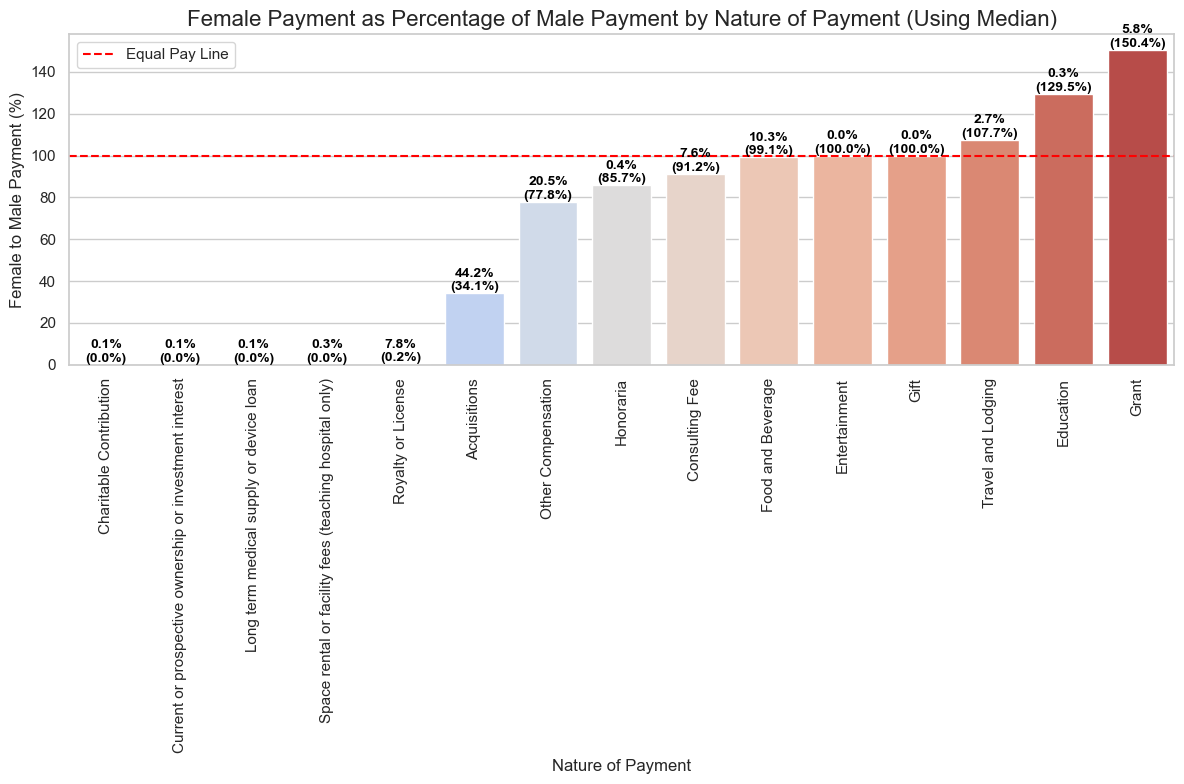

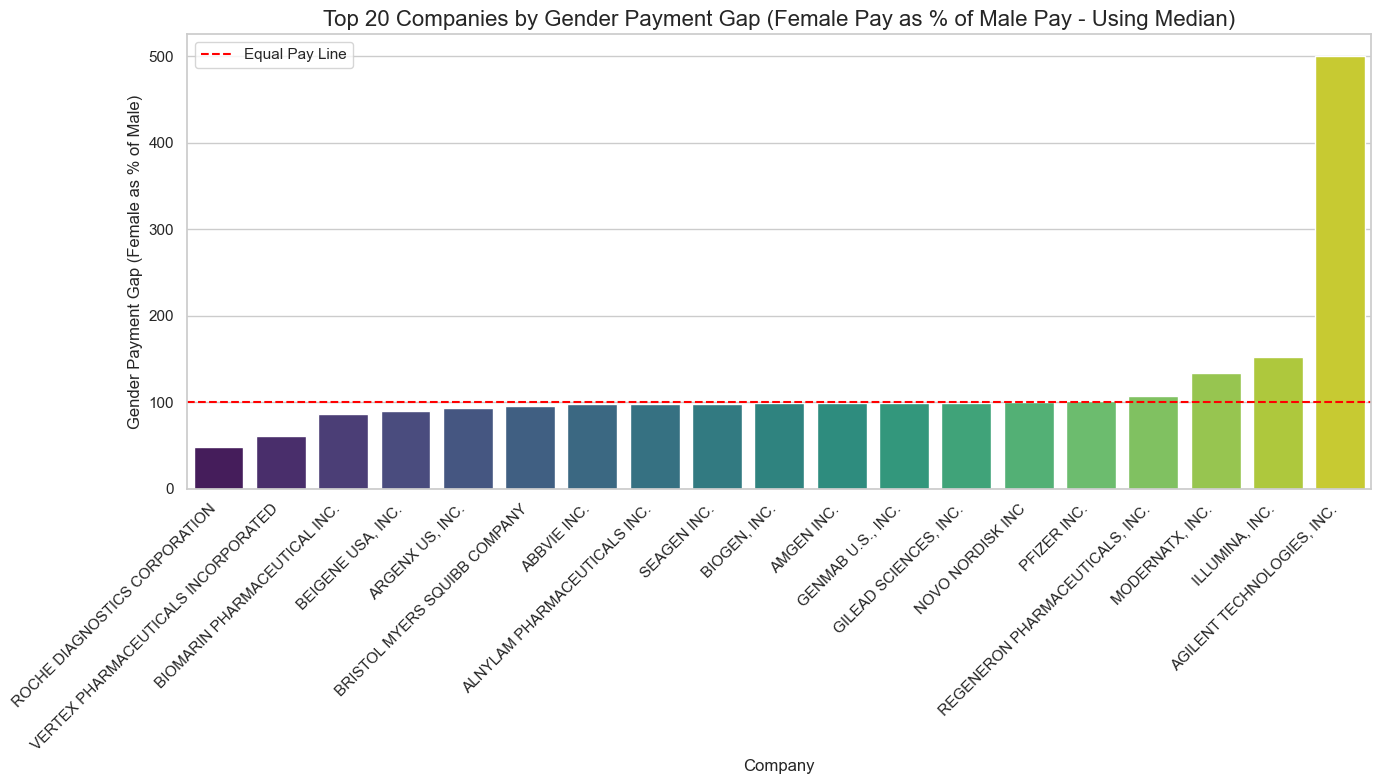

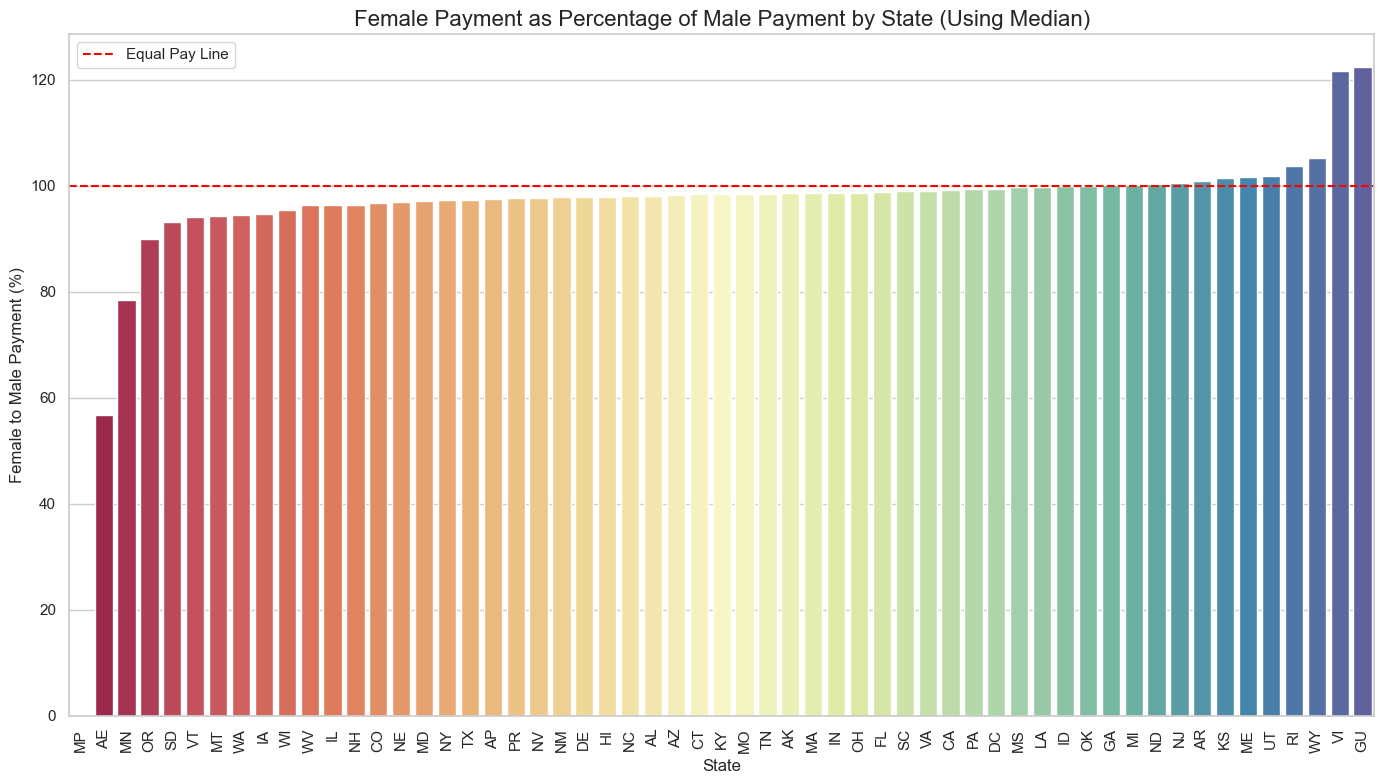

(0.009000000000000001, 6.13]: Total Recipients = 295644, Female = 147283, Male = 148361
(6.13, 10.63]: Total Recipients = 295611, Female = 148370, Male = 147241
(10.63, 13.17]: Total Recipients = 296411, Female = 145169, Male = 151242
(13.17, 14.86]: Total Recipients = 295912, Female = 143755, Male = 152157
(14.86, 16.58]: Total Recipients = 295474, Female = 145241, Male = 150233
(16.58, 18.45]: Total Recipients = 294890, Female = 144784, Male = 150106
(18.45, 20.68]: Total Recipients = 296330, Female = 144241, Male = 152089
(20.68, 23.72]: Total Recipients = 295361, Female = 143012, Male = 152349
(23.72, 29.76]: Total Recipients = 295077, Female = 140424, Male = 154653
(29.76, 72173105.85]: Total Recipients = 295335, Female = 130259, Male = 165076


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame called df
# Example: df = pd.read_csv('final_v2.csv')

# 1. Clean Data: Standardize the Gender column by removing single quotes and whitespaces
df_2022['Gender_from_bert'] = df_2022['Gender_from_bert'].str.replace("'", "").str.strip()

# Shorten specific long names in the 'Nature_of_Payment_or_Transfer_of_Value' column
df_2022['Nature_of_Payment_or_Transfer_of_Value'] = df_2022['Nature_of_Payment_or_Transfer_of_Value'].replace(
    {
        'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program': 'Other Compensation',
        'Compensation for serving as faculty or as a speaker for a medical education program': 'Other Compensation'
    }
)

# Normalize the company names by converting to uppercase, removing extra spaces, and stripping any leading/trailing spaces
df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] \
    .str.upper() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.strip()

# Consolidate all companies that contain the keyword 'ABBVIE' into a single label 'ABBVIE INC.'
df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].apply(
    lambda x: 'ABBVIE INC.' if 'ABBVIE' in x else x
)

# Set seaborn theme for consistent plot style
sns.set_theme(style="whitegrid")

# 2. Gender Payment Gap by Nature of Payment (Using Median)

# Group by payment type and gender to calculate the median amount paid
payment_gender_gap_median = df_2022.groupby(['Nature_of_Payment_or_Transfer_of_Value', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
payment_gender_gap_median = payment_gender_gap_median.fillna(0)

# Calculate the gender payment gap as a percentage of female to male median payments for each payment type
payment_gender_gap_median['Female_to_Male_%'] = payment_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Calculate the percentage of total payment for each payment type
total_payment = df_2022['Total_Amount_of_Payment_USDollars'].sum()
payment_totals = df_2022.groupby('Nature_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'].sum()
payment_gender_gap_median['Total_Payment_%'] = payment_totals / total_payment * 100

# Sort payment types by the gap percentage in ascending order to highlight the gaps
payment_gender_gap_median_sorted = payment_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=True)

# Plot the gender payment gap rate for each payment type using a bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=payment_gender_gap_median_sorted.index, y='Female_to_Male_%', data=payment_gender_gap_median_sorted, palette='coolwarm')
plt.title('Female Payment as Percentage of Male Payment by Nature of Payment (Using Median)', fontsize=16)
plt.ylabel('Female to Male Payment (%)')
plt.xlabel('Nature of Payment')
plt.xticks(rotation=90, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')

# Annotate each bar with the percentage of total payment and the gap value
for i, bar in enumerate(barplot.patches):
    total_payment_pct = payment_gender_gap_median_sorted['Total_Payment_%'].iloc[i]
    gap_value = payment_gender_gap_median_sorted['Female_to_Male_%'].iloc[i]
    barplot.annotate(f"{total_payment_pct:.1f}%\n({gap_value:.1f}%)", 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Gender Payment Gap Ranking for Companies (Using Median)

# Group by company and gender to calculate the median payment amount for each company
company_gender_gap_median = df_2022.groupby(['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
company_gender_gap_median = company_gender_gap_median.fillna(0)

# Calculate the gender payment gap (Female as a percentage of Male payment) for each company
company_gender_gap_median['Gap (%)'] = company_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort the companies by the gender payment gap in ascending order to highlight the gaps
company_gender_gap_median_sorted = company_gender_gap_median.sort_values(by='Gap (%)', ascending=True)

# Plot the top 20 companies sorted by gender payment gap
plt.figure(figsize=(14, 8))
sns.barplot(x=company_gender_gap_median_sorted.index[:20], y='Gap (%)', data=company_gender_gap_median_sorted, palette='viridis')
plt.title('Top 20 Companies by Gender Payment Gap (Female Pay as % of Male Pay - Using Median)', fontsize=16)
plt.ylabel('Gender Payment Gap (Female as % of Male)')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Gender Payment Gap by State (Using Median)

# Group by state and gender to calculate the median payment amount for each state
state_gender_gap_median = df_2022.groupby(['Recipient_State', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
state_gender_gap_median = state_gender_gap_median.fillna(0)

# Calculate the gender payment gap as a percentage of female to male payments for each state
state_gender_gap_median['Female_to_Male_%'] = state_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort states by gender payment gap
state_gender_gap_median_sorted = state_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=True)

# Plot gender payment gap rate for each state using a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=state_gender_gap_median_sorted.index, y='Female_to_Male_%', data=state_gender_gap_median_sorted, palette='Spectral')
plt.title('Female Payment as Percentage of Male Payment by State (Using Median)', fontsize=16)
plt.ylabel('Female to Male Payment (%)')
plt.xlabel('State')
plt.xticks(rotation=90, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Gender Job Opportunity Gap Rate

# Sort the dataset by payment amount
df_sorted = df_2022.sort_values(by='Total_Amount_of_Payment_USDollars')

# Split the sorted dataset into 10 equal buckets
df_2022['Bucket'] = pd.qcut(df_sorted['Total_Amount_of_Payment_USDollars'], q=10, duplicates='drop')

# Group by bucket and gender to calculate the number of payments
bucket_gender_counts = df_2022.groupby(['Bucket', 'Gender_from_bert']).size().unstack()

# Replace NaN values with 0 to avoid issues with missing data
bucket_gender_counts = bucket_gender_counts.fillna(0)

# Calculate the gender job opportunity gap rate for each bucket
bucket_gender_counts['Female_to_Male_Ratio'] = bucket_gender_counts.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Cross-verify the total number of recipients in each bucket
for bucket in bucket_gender_counts.index:
    total_recipients = bucket_gender_counts.loc[bucket, 'Female'] + bucket_gender_counts.loc[bucket, 'Male']
    print(f"{bucket}: Total Recipients = {total_recipients}, Female = {bucket_gender_counts.loc[bucket, 'Female']}, Male = {bucket_gender_counts.loc[bucket, 'Male']}")

# Plot the gender job opportunity gap rate for each payment bucket using a bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=bucket_gender_counts.index, y='Female_to_Male_Ratio', data=bucket_gender_counts, palette='Blues')
plt.title('Gender Job Opportunity Gap Rate by Payment Buckets - 2021', fontsize=16)
plt.ylabel('Female to Male Ratio (%)')
plt.xlabel('Payment Amount Buckets')
plt.xticks(rotation=45, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Opportunity Line')

# Annotate each bar with the female-to-male ratio and bucket range
for i, bar in enumerate(barplot.patches):
    female_to_male_ratio = bucket_gender_counts.iloc[i]['Female_to_Male_Ratio']
    barplot.annotate(f"{female_to_male_ratio:.1f}",
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend()
plt.tight_layout()
plt.show()


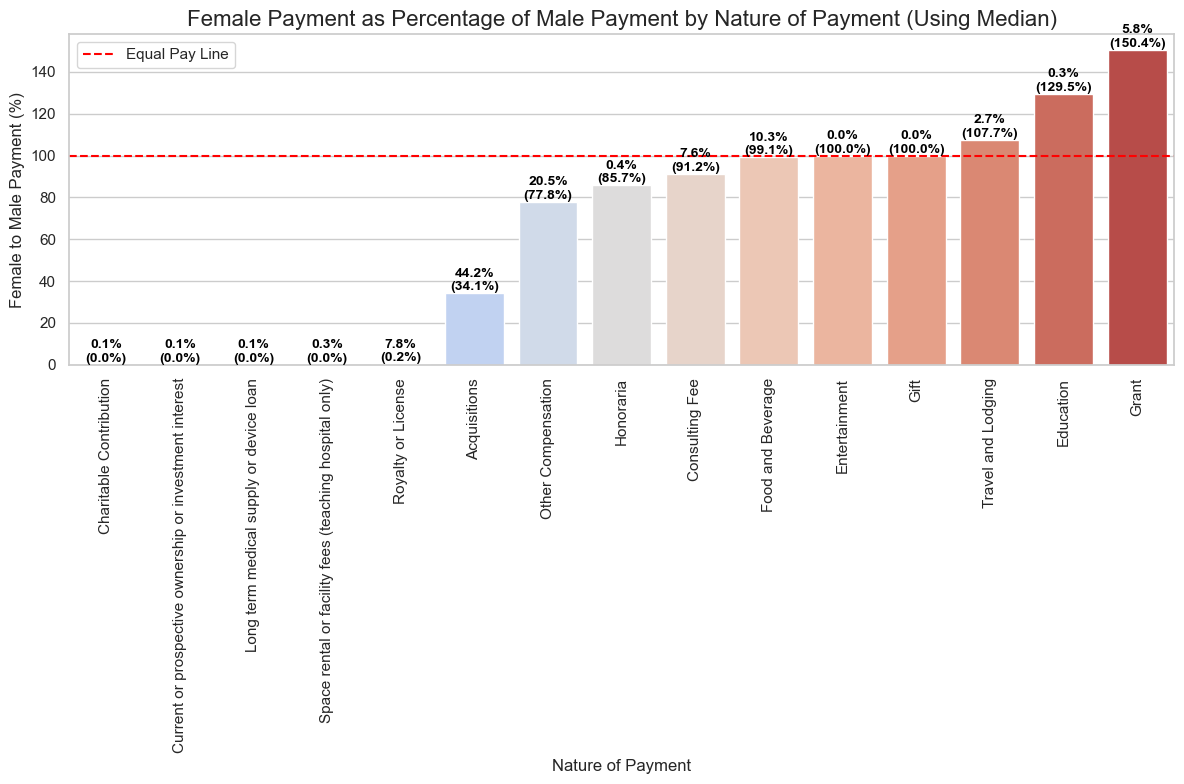

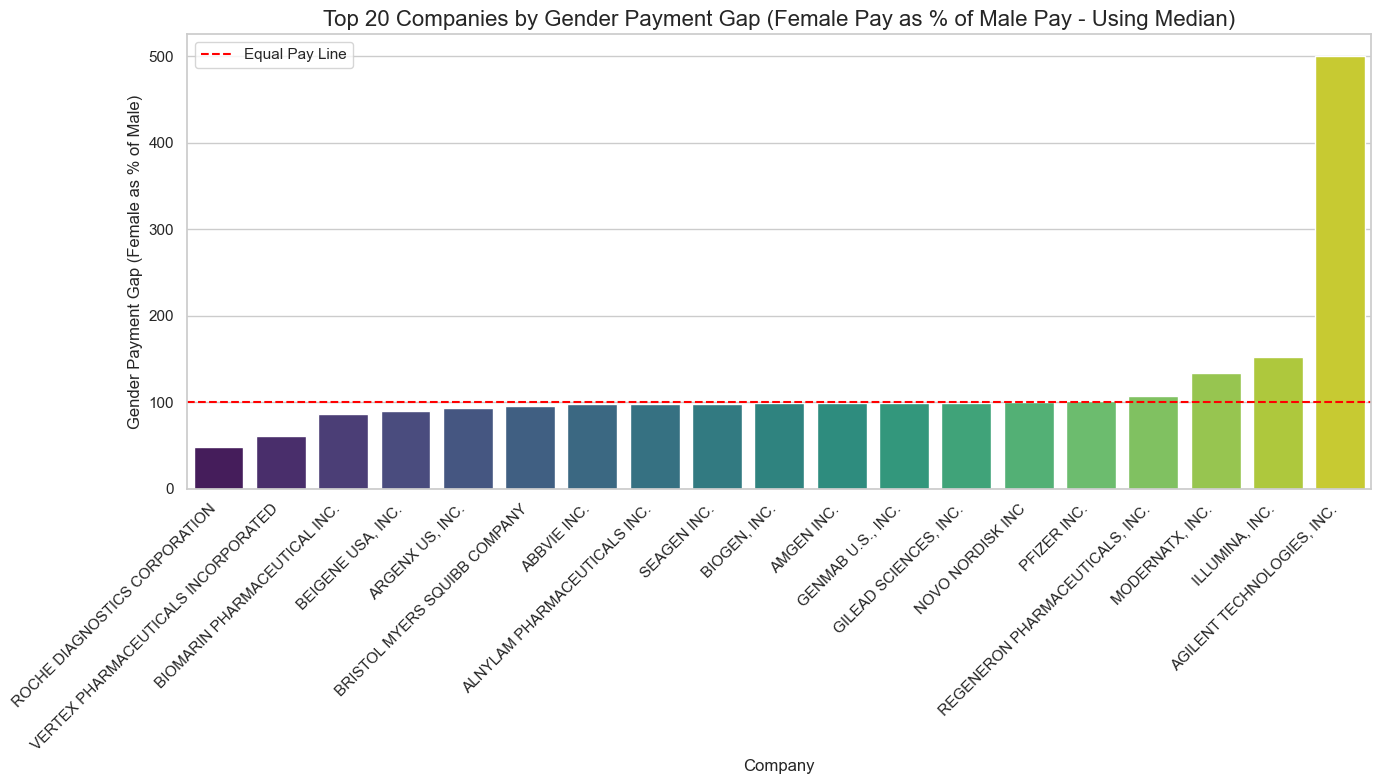

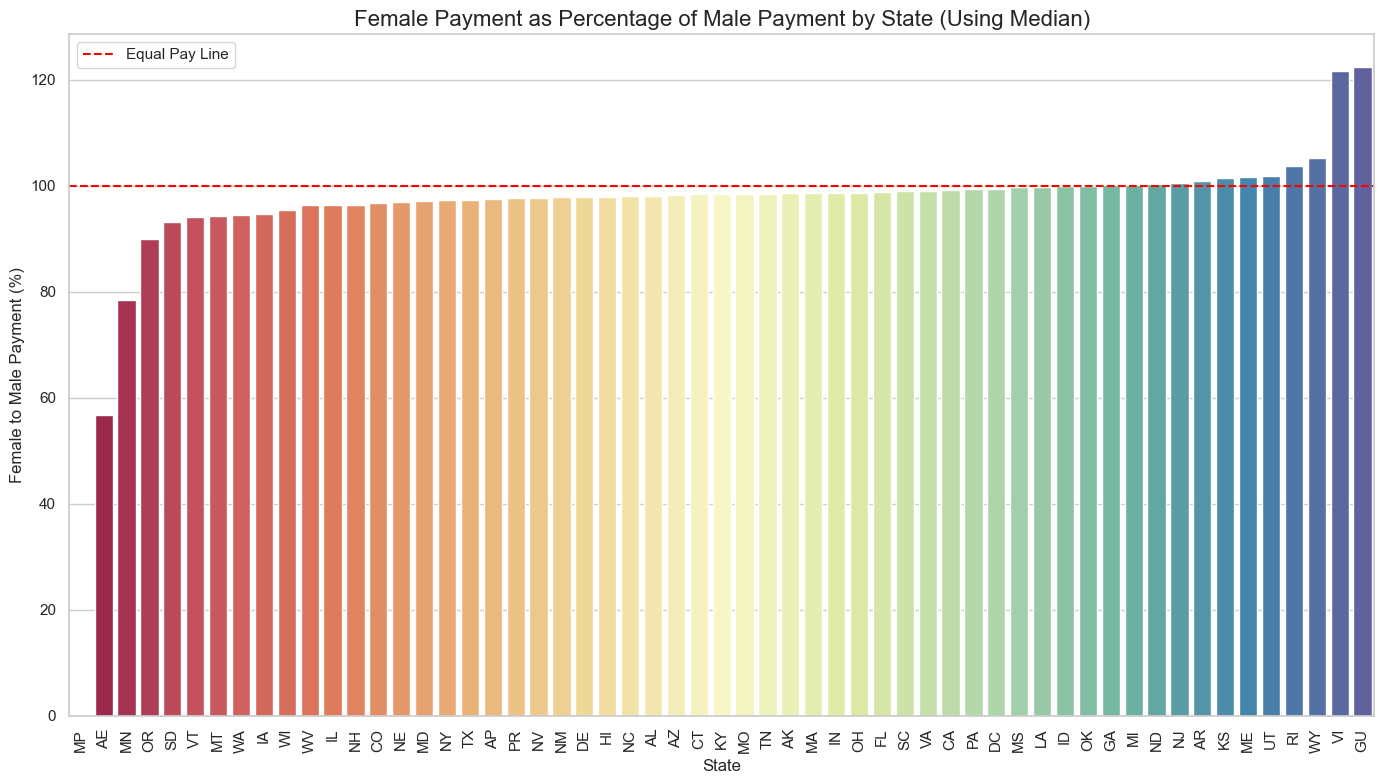

(0.009000000000000001, 6.13]: Total Recipients = 295644, Female = 147283, Male = 148361
(6.13, 10.63]: Total Recipients = 295611, Female = 148370, Male = 147241
(10.63, 13.17]: Total Recipients = 296411, Female = 145169, Male = 151242
(13.17, 14.86]: Total Recipients = 295912, Female = 143755, Male = 152157
(14.86, 16.58]: Total Recipients = 295474, Female = 145241, Male = 150233
(16.58, 18.45]: Total Recipients = 294890, Female = 144784, Male = 150106
(18.45, 20.68]: Total Recipients = 296330, Female = 144241, Male = 152089
(20.68, 23.72]: Total Recipients = 295361, Female = 143012, Male = 152349
(23.72, 29.76]: Total Recipients = 295077, Female = 140424, Male = 154653
(29.76, 72173105.85]: Total Recipients = 295335, Female = 130259, Male = 165076


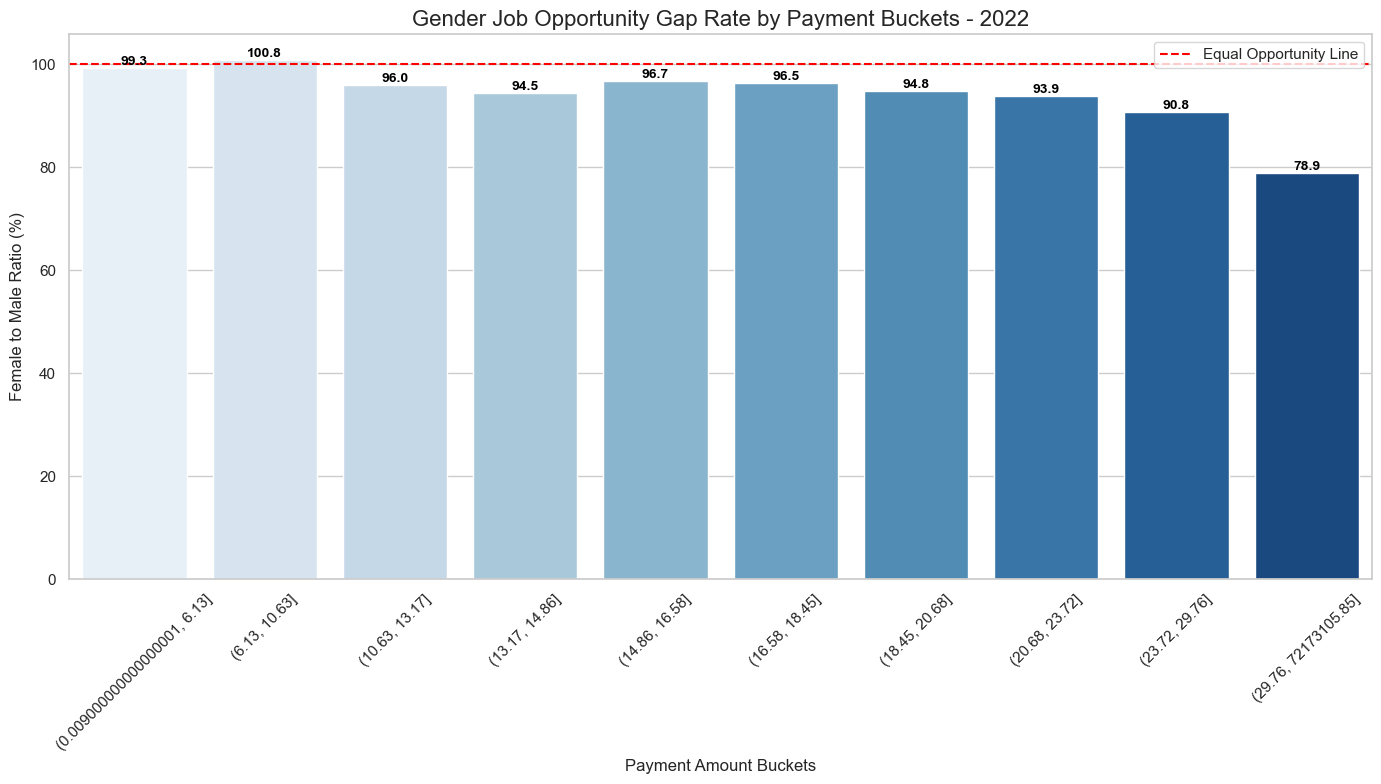

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame called df
# Example: df = pd.read_csv('final_v2.csv')

# 1. Clean Data: Standardize the Gender column by removing single quotes and whitespaces
df_2022['Gender_from_bert'] = df_2022['Gender_from_bert'].str.replace("'", "").str.strip()

# Shorten specific long names in the 'Nature_of_Payment_or_Transfer_of_Value' column
df_2022['Nature_of_Payment_or_Transfer_of_Value'] = df_2022['Nature_of_Payment_or_Transfer_of_Value'].replace(
    {
        'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program': 'Other Compensation',
        'Compensation for serving as faculty or as a speaker for a medical education program': 'Other Compensation'
    }
)

# Normalize the company names by converting to uppercase, removing extra spaces, and stripping any leading/trailing spaces
df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] \
    .str.upper() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.strip()

# Consolidate all companies that contain the keyword 'ABBVIE' into a single label 'ABBVIE INC.'
df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2022['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].apply(
    lambda x: 'ABBVIE INC.' if 'ABBVIE' in x else x
)

# Set seaborn theme for consistent plot style
sns.set_theme(style="whitegrid")

# 2. Gender Payment Gap by Nature of Payment (Using Median)

# Group by payment type and gender to calculate the median amount paid
payment_gender_gap_median = df_2022.groupby(['Nature_of_Payment_or_Transfer_of_Value', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
payment_gender_gap_median = payment_gender_gap_median.fillna(0)

# Calculate the gender payment gap as a percentage of female to male median payments for each payment type
payment_gender_gap_median['Female_to_Male_%'] = payment_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Calculate the percentage of total payment for each payment type
total_payment = df_2022['Total_Amount_of_Payment_USDollars'].sum()
payment_totals = df_2022.groupby('Nature_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'].sum()
payment_gender_gap_median['Total_Payment_%'] = payment_totals / total_payment * 100

# Sort payment types by the gap percentage in ascending order to highlight the gaps
payment_gender_gap_median_sorted = payment_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=True)

# Plot the gender payment gap rate for each payment type using a bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=payment_gender_gap_median_sorted.index, y='Female_to_Male_%', data=payment_gender_gap_median_sorted, palette='coolwarm')
plt.title('Female Payment as Percentage of Male Payment by Nature of Payment (Using Median)', fontsize=16)
plt.ylabel('Female to Male Payment (%)')
plt.xlabel('Nature of Payment')
plt.xticks(rotation=90, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')

# Annotate each bar with the percentage of total payment and the gap value
for i, bar in enumerate(barplot.patches):
    total_payment_pct = payment_gender_gap_median_sorted['Total_Payment_%'].iloc[i]
    gap_value = payment_gender_gap_median_sorted['Female_to_Male_%'].iloc[i]
    barplot.annotate(f"{total_payment_pct:.1f}%\n({gap_value:.1f}%)", 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Gender Payment Gap Ranking for Companies (Using Median)

# Group by company and gender to calculate the median payment amount for each company
company_gender_gap_median = df_2022.groupby(['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
company_gender_gap_median = company_gender_gap_median.fillna(0)

# Calculate the gender payment gap (Female as a percentage of Male payment) for each company
company_gender_gap_median['Gap (%)'] = company_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort the companies by the gender payment gap in ascending order to highlight the gaps
company_gender_gap_median_sorted = company_gender_gap_median.sort_values(by='Gap (%)', ascending=True)

# Plot the top 20 companies sorted by gender payment gap
plt.figure(figsize=(14, 8))
sns.barplot(x=company_gender_gap_median_sorted.index[:20], y='Gap (%)', data=company_gender_gap_median_sorted, palette='viridis')
plt.title('Top 20 Companies by Gender Payment Gap (Female Pay as % of Male Pay - Using Median)', fontsize=16)
plt.ylabel('Gender Payment Gap (Female as % of Male)')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Gender Payment Gap by State (Using Median)

# Group by state and gender to calculate the median payment amount for each state
state_gender_gap_median = df_2022.groupby(['Recipient_State', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
state_gender_gap_median = state_gender_gap_median.fillna(0)

# Calculate the gender payment gap as a percentage of female to male payments for each state
state_gender_gap_median['Female_to_Male_%'] = state_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort states by gender payment gap
state_gender_gap_median_sorted = state_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=True)

# Plot gender payment gap rate for each state using a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=state_gender_gap_median_sorted.index, y='Female_to_Male_%', data=state_gender_gap_median_sorted, palette='Spectral')
plt.title('Female Payment as Percentage of Male Payment by State (Using Median)', fontsize=16)
plt.ylabel('Female to Male Payment (%)')
plt.xlabel('State')
plt.xticks(rotation=90, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Gender Job Opportunity Gap Rate

# Sort the dataset by payment amount
df_sorted = df_2022.sort_values(by='Total_Amount_of_Payment_USDollars')

# Split the sorted dataset into 10 equal buckets
df_2022['Bucket'] = pd.qcut(df_sorted['Total_Amount_of_Payment_USDollars'], q=10, duplicates='drop')

# Group by bucket and gender to calculate the number of payments
bucket_gender_counts = df_2022.groupby(['Bucket', 'Gender_from_bert']).size().unstack()

# Replace NaN values with 0 to avoid issues with missing data
bucket_gender_counts = bucket_gender_counts.fillna(0)

# Calculate the gender job opportunity gap rate for each bucket
bucket_gender_counts['Female_to_Male_Ratio'] = bucket_gender_counts.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Cross-verify the total number of recipients in each bucket
for bucket in bucket_gender_counts.index:
    total_recipients = bucket_gender_counts.loc[bucket, 'Female'] + bucket_gender_counts.loc[bucket, 'Male']
    print(f"{bucket}: Total Recipients = {total_recipients}, Female = {bucket_gender_counts.loc[bucket, 'Female']}, Male = {bucket_gender_counts.loc[bucket, 'Male']}")

# Plot the gender job opportunity gap rate for each payment bucket using a bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=bucket_gender_counts.index, y='Female_to_Male_Ratio', data=bucket_gender_counts, palette='Blues')
plt.title('Gender Job Opportunity Gap Rate by Payment Buckets - 2022', fontsize=16)
plt.ylabel('Female to Male Ratio (%)')
plt.xlabel('Payment Amount Buckets')
plt.xticks(rotation=45, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Opportunity Line')

# Annotate each bar with the female-to-male ratio and bucket range
for i, bar in enumerate(barplot.patches):
    female_to_male_ratio = bucket_gender_counts.iloc[i]['Female_to_Male_Ratio']
    barplot.annotate(f"{female_to_male_ratio:.1f}",
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend()
plt.tight_layout()
plt.show()


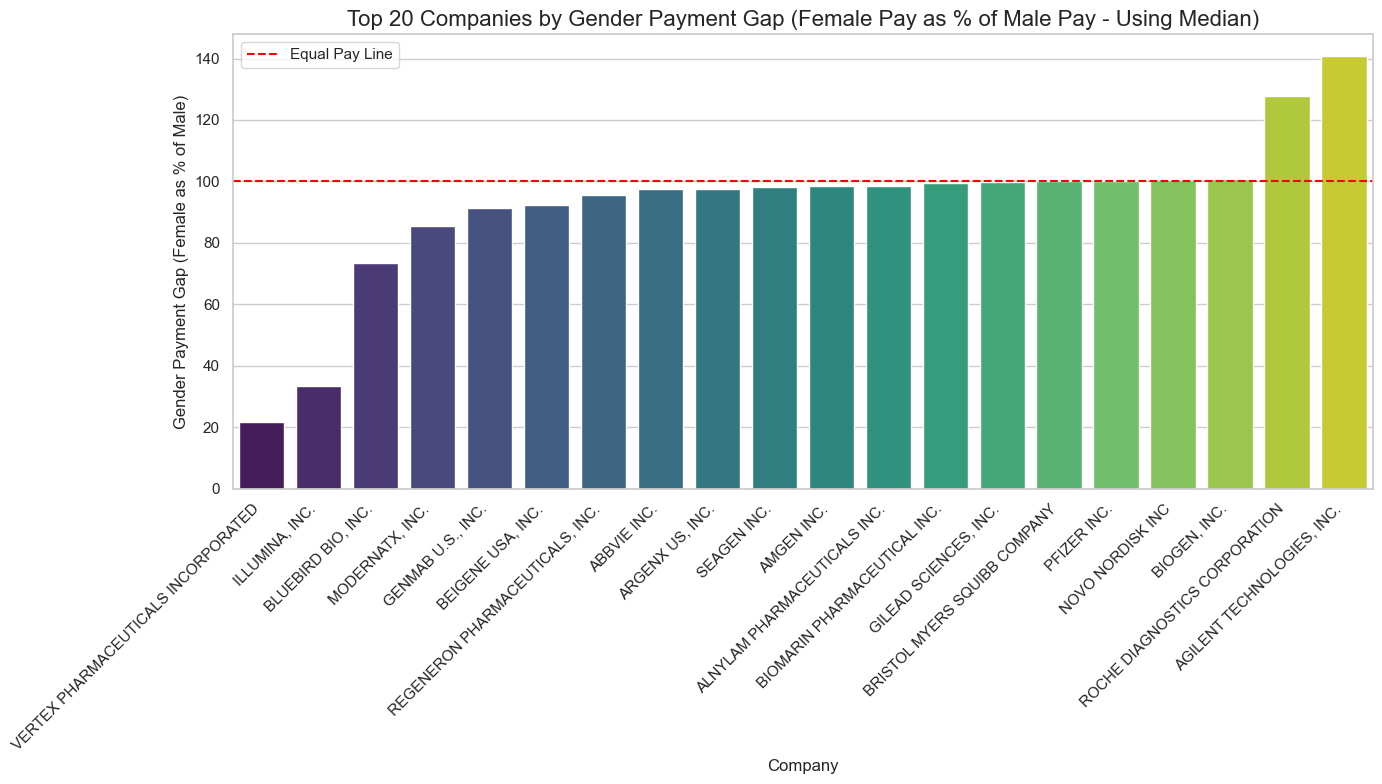

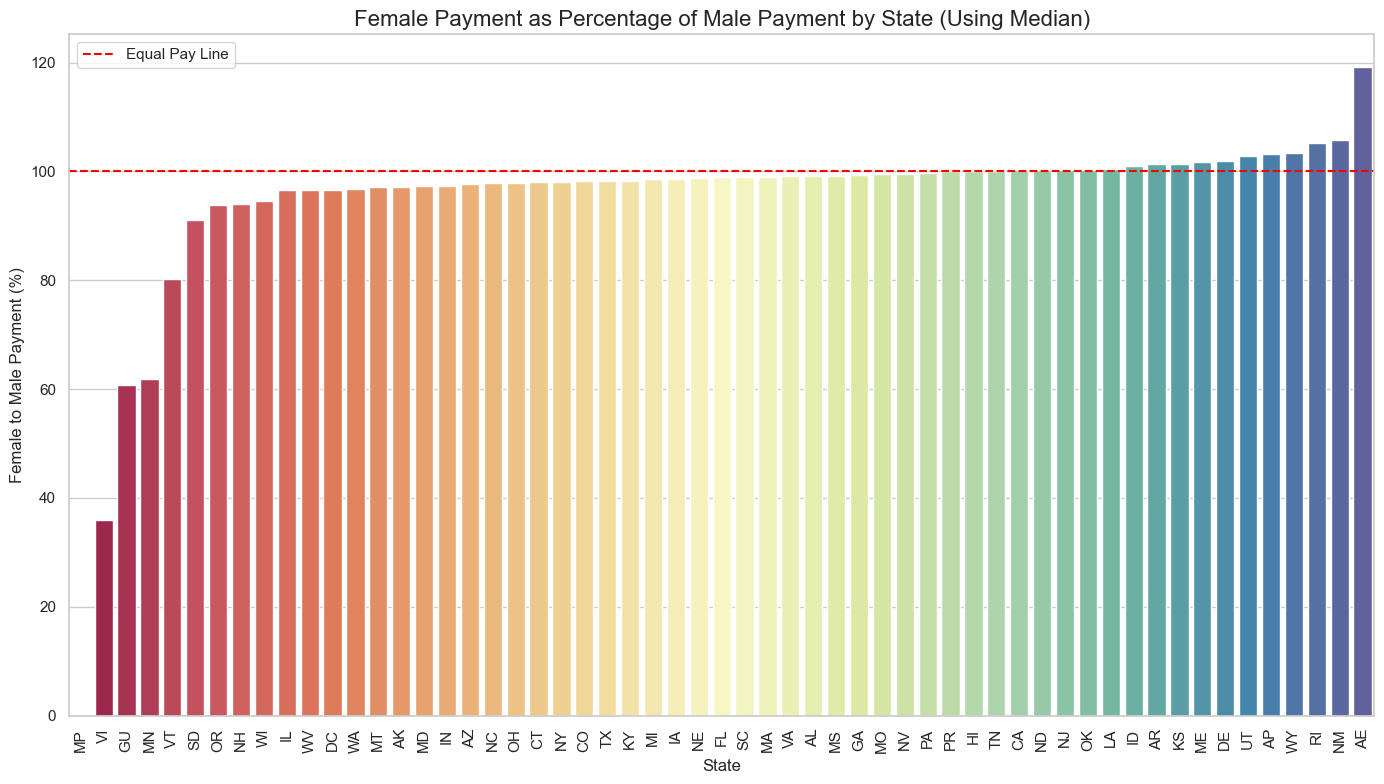

(0.009000000000000001, 6.67]: Total Recipients = 338762, Female = 175315, Male = 163447
(6.67, 11.25]: Total Recipients = 337444, Female = 175419, Male = 162025
(11.25, 13.98]: Total Recipients = 337600, Female = 171715, Male = 165885
(13.98, 15.69]: Total Recipients = 338442, Female = 172559, Male = 165883
(15.69, 17.37]: Total Recipients = 337487, Female = 171591, Male = 165896
(17.37, 19.29]: Total Recipients = 337929, Female = 172000, Male = 165929
(19.29, 21.65]: Total Recipients = 338466, Female = 171056, Male = 167410
(21.65, 24.86]: Total Recipients = 337635, Female = 168900, Male = 168735
(24.86, 33.06]: Total Recipients = 337715, Female = 167335, Male = 170380
(33.06, 10069861.06]: Total Recipients = 335906, Female = 158804, Male = 177102


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame called df
# Example: df = pd.read_csv('final_v2.csv')

# 1. Clean Data: Standardize the Gender column by removing single quotes and whitespaces
df_2023['Gender_from_bert'] = df_2023['Gender_from_bert'].str.replace("'", "").str.strip()

# Shorten specific long names in the 'Nature_of_Payment_or_Transfer_of_Value' column
df_2023['Nature_of_Payment_or_Transfer_of_Value'] = df_2023['Nature_of_Payment_or_Transfer_of_Value'].replace(
    {
        'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program': 'Other Compensation',
        'Compensation for serving as faculty or as a speaker for a medical education program': 'Other Compensation'
    }
)

# Normalize the company names by converting to uppercase, removing extra spaces, and stripping any leading/trailing spaces
df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] \
    .str.upper() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.strip()

# Consolidate all companies that contain the keyword 'ABBVIE' into a single label 'ABBVIE INC.'
df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2023['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].apply(
    lambda x: 'ABBVIE INC.' if 'ABBVIE' in x else x
)

# Set seaborn theme for consistent plot style
sns.set_theme(style="whitegrid")

# 2. Gender Payment Gap by Nature of Payment (Using Median)

# Group by payment type and gender to calculate the median amount paid
payment_gender_gap_median = df_2023.groupby(['Nature_of_Payment_or_Transfer_of_Value', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
payment_gender_gap_median = payment_gender_gap_median.fillna(0)

# Calculate the gender payment gap as a percentage of female to male median payments for each payment type
payment_gender_gap_median['Female_to_Male_%'] = payment_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Calculate the percentage of total payment for each payment type
total_payment = df_2023['Total_Amount_of_Payment_USDollars'].sum()
payment_totals = df_2023.groupby('Nature_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'].sum()
payment_gender_gap_median['Total_Payment_%'] = payment_totals / total_payment * 100

# Sort payment types by the gap percentage in ascending order to highlight the gaps
payment_gender_gap_median_sorted = payment_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=True)

# Plot the gender payment gap rate for each payment type using a bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=payment_gender_gap_median_sorted.index, y='Female_to_Male_%', data=payment_gender_gap_median_sorted, palette='coolwarm')
plt.title('Female Payment as Percentage of Male Payment by Nature of Payment (Using Median)', fontsize=16)
plt.ylabel('Female to Male Payment (%)')
plt.xlabel('Nature of Payment')
plt.xticks(rotation=90, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')

# Annotate each bar with the percentage of total payment and the gap value
for i, bar in enumerate(barplot.patches):
    total_payment_pct = payment_gender_gap_median_sorted['Total_Payment_%'].iloc[i]
    gap_value = payment_gender_gap_median_sorted['Female_to_Male_%'].iloc[i]
    barplot.annotate(f"{total_payment_pct:.1f}%\n({gap_value:.1f}%)", 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Gender Payment Gap Ranking for Companies (Using Median)

# Group by company and gender to calculate the median payment amount for each company
company_gender_gap_median = df_2023.groupby(['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
company_gender_gap_median = company_gender_gap_median.fillna(0)

# Calculate the gender payment gap (Female as a percentage of Male payment) for each company
company_gender_gap_median['Gap (%)'] = company_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort the companies by the gender payment gap in ascending order to highlight the gaps
company_gender_gap_median_sorted = company_gender_gap_median.sort_values(by='Gap (%)', ascending=True)

# Plot the top 20 companies sorted by gender payment gap
plt.figure(figsize=(14, 8))
sns.barplot(x=company_gender_gap_median_sorted.index[:20], y='Gap (%)', data=company_gender_gap_median_sorted, palette='viridis')
plt.title('Top 20 Companies by Gender Payment Gap (Female Pay as % of Male Pay - Using Median)', fontsize=16)
plt.ylabel('Gender Payment Gap (Female as % of Male)')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Gender Payment Gap by State (Using Median)

# Group by state and gender to calculate the median payment amount for each state
state_gender_gap_median = df_2023.groupby(['Recipient_State', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
state_gender_gap_median = state_gender_gap_median.fillna(0)

# Calculate the gender payment gap as a percentage of female to male payments for each state
state_gender_gap_median['Female_to_Male_%'] = state_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort states by gender payment gap
state_gender_gap_median_sorted = state_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=True)

# Plot gender payment gap rate for each state using a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=state_gender_gap_median_sorted.index, y='Female_to_Male_%', data=state_gender_gap_median_sorted, palette='Spectral')
plt.title('Female Payment as Percentage of Male Payment by State (Using Median)', fontsize=16)
plt.ylabel('Female to Male Payment (%)')
plt.xlabel('State')
plt.xticks(rotation=90, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Gender Job Opportunity Gap Rate

# Sort the dataset by payment amount
df_sorted = df_2023.sort_values(by='Total_Amount_of_Payment_USDollars')

# Split the sorted dataset into 10 equal buckets
df_2023['Bucket'] = pd.qcut(df_sorted['Total_Amount_of_Payment_USDollars'], q=10, duplicates='drop')

# Group by bucket and gender to calculate the number of payments
bucket_gender_counts = df_2023.groupby(['Bucket', 'Gender_from_bert']).size().unstack()

# Replace NaN values with 0 to avoid issues with missing data
bucket_gender_counts = bucket_gender_counts.fillna(0)

# Calculate the gender job opportunity gap rate for each bucket
bucket_gender_counts['Female_to_Male_Ratio'] = bucket_gender_counts.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Cross-verify the total number of recipients in each bucket
for bucket in bucket_gender_counts.index:
    total_recipients = bucket_gender_counts.loc[bucket, 'Female'] + bucket_gender_counts.loc[bucket, 'Male']
    print(f"{bucket}: Total Recipients = {total_recipients}, Female = {bucket_gender_counts.loc[bucket, 'Female']}, Male = {bucket_gender_counts.loc[bucket, 'Male']}")

# Plot the gender job opportunity gap rate for each payment bucket using a bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=bucket_gender_counts.index, y='Female_to_Male_Ratio', data=bucket_gender_counts, palette='Blues')
plt.title('Gender Job Opportunity Gap Rate by Payment Buckets - 2023', fontsize=16)
plt.ylabel('Female to Male Ratio (%)')
plt.xlabel('Payment Amount Buckets')
plt.xticks(rotation=45, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Opportunity Line')

# Annotate each bar with the female-to-male ratio and bucket range
for i, bar in enumerate(barplot.patches):
    female_to_male_ratio = bucket_gender_counts.iloc[i]['Female_to_Male_Ratio']
    barplot.annotate(f"{female_to_male_ratio:.1f}",
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend()
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import plotly.express as px

def plot_gender_gap_by_payment_buckets(dataframes, year_labels):
    """
    Plots the gender job opportunity gap rate by payment buckets for multiple dataframes.

    Parameters:
    - dataframes (list): List of pandas DataFrames, each representing data for a specific year.
    - year_labels (list): List of corresponding year labels (e.g., [2021, 2022, 2023]).

    Returns:
    - None: Displays the visualizations for each year.
    """
    for df, year in zip(dataframes, year_labels):
        # Sort dataset and bucket payment amounts
        df_sorted = df.sort_values(by='Total_Amount_of_Payment_USDollars')
        df['Bucket'] = pd.qcut(df_sorted['Total_Amount_of_Payment_USDollars'], q=10, duplicates='drop')

        # Group by bucket and gender
        bucket_gender_counts = df.groupby(['Bucket', 'Gender_from_bert']).size().unstack().fillna(0)

        # Calculate gap percentages
        bucket_gender_counts['Female_to_Male_Ratio'] = bucket_gender_counts.apply(
            lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
        )

        # Create bar chart
        fig = px.bar(
            bucket_gender_counts,
            x=bucket_gender_counts.index.astype(str),
            y='Female_to_Male_Ratio',
            labels={'Female_to_Male_Ratio': 'Female-to-Male Ratio (%)'},
            title=f'Gender Job Opportunity Gap Rate by Payment Buckets - {year}',
            color='Female_to_Male_Ratio',
            color_continuous_scale=px.colors.sequential.Blues[::-1]
        )
        fig.update_layout(
            xaxis_title='Payment Amount Buckets',
            yaxis_title='Female-to-Male Ratio (%)',
            xaxis_tickangle=45
        )
        fig.show()


In [13]:
# Example list of dataframes and corresponding years
dataframes = [df_2021, df_2022, df_2023]
year_labels = [2021, 2022, 2023]

# Call the function
plot_gender_gap_by_payment_buckets(dataframes, year_labels)


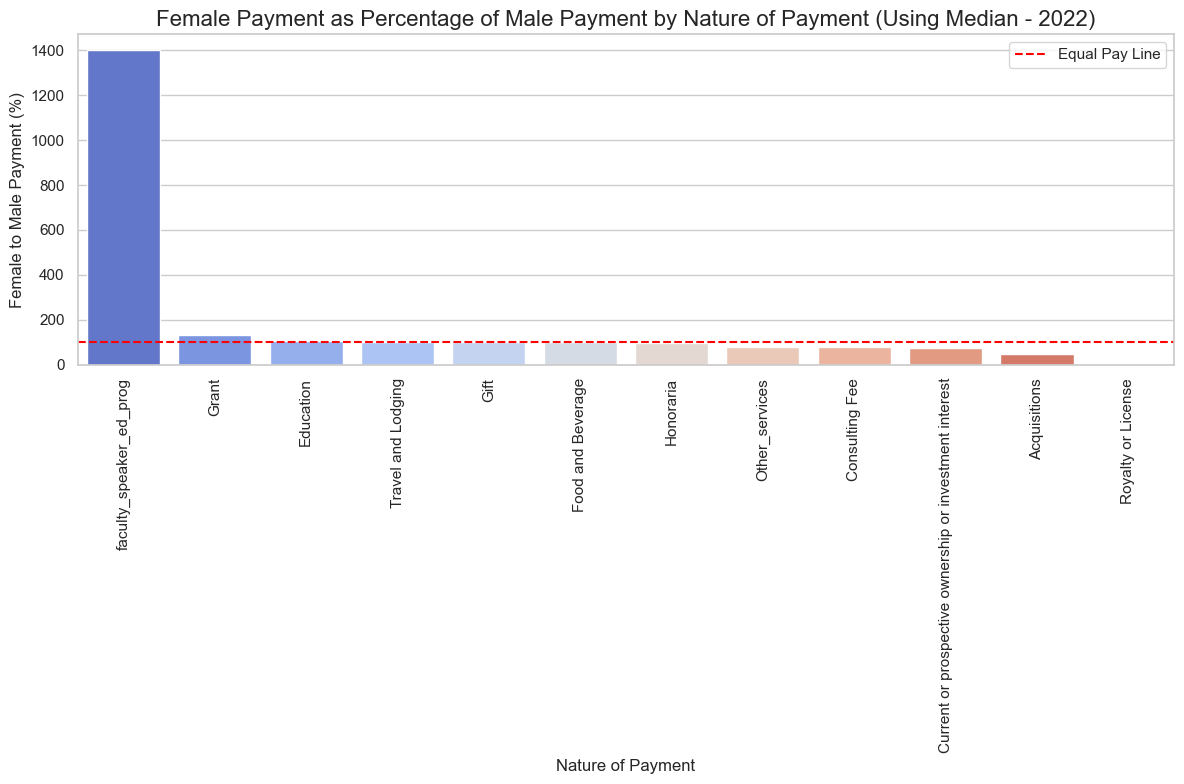

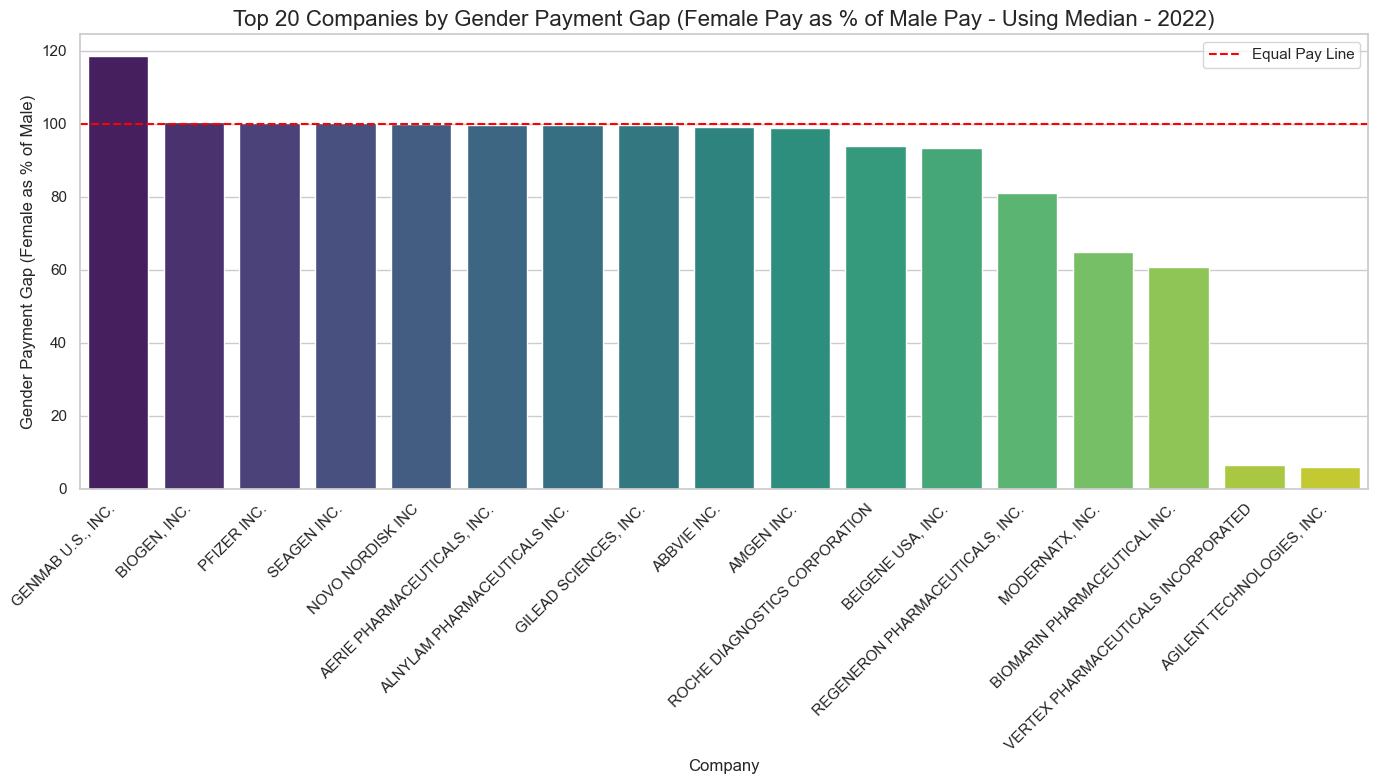

Total Payment Amount for All Companies: $299,860,633.46
Total Number of Records: 2678867
Total Number of Male Recipients: 1414570
Total Number of Female Recipients: 1262564


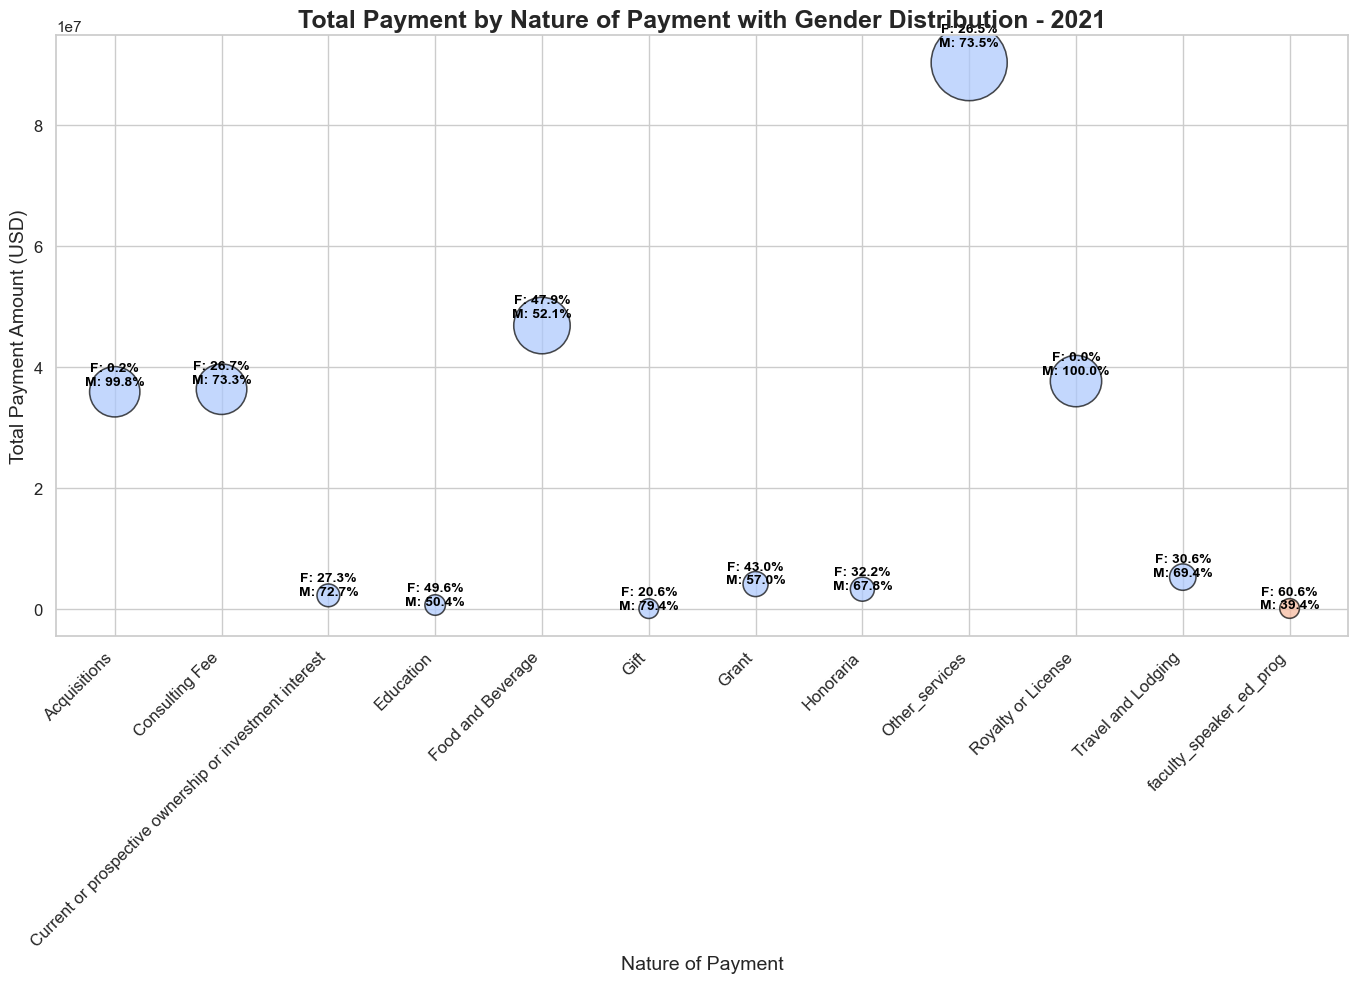

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame called df
# Example: df = pd.read_csv('final_v2.csv')

# 1. Clean Data: Standardize the Gender column by removing single quotes and whitespaces
df_2021['Gender_from_bert'] = df_2021['Gender_from_bert'].str.replace("'", "").str.strip()

# Shorten specific long names in the 'Nature_of_Payment_or_Transfer_of_Value' column
df_2021['Nature_of_Payment_or_Transfer_of_Value'] = df_2021['Nature_of_Payment_or_Transfer_of_Value'].replace(
    {
        'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program': 'Non-Consulting Services',
        'Compensation for serving as faculty or as a speaker for a medical education program': 'Education Speaker Fee'
    }
)

# Normalize the company names by converting to uppercase, removing extra spaces, and stripping any leading/trailing spaces
df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] \
    .str.upper() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.strip()

# Consolidate all companies that contain the keyword 'ABBVIE' into a single label 'ABBVIE INC.'
df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] = df_2021['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].apply(
    lambda x: 'ABBVIE INC.' if 'ABBVIE' in x else x
)

# Set seaborn theme for consistent plot style
sns.set_theme(style="whitegrid")

# 2. Gender Payment Gap by Nature of Payment (Using Median)

# Group by payment type and gender to calculate the median amount paid
payment_gender_gap_median = df_2021.groupby(['Nature_of_Payment_or_Transfer_of_Value', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
payment_gender_gap_median = payment_gender_gap_median.fillna(0)

# Calculate the gender payment gap as a percentage of female to male median payments for each payment type
payment_gender_gap_median['Female_to_Male_%'] = payment_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort payment types by the gap percentage
payment_gender_gap_median_sorted = payment_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=False)

# Plot the gender payment gap rate for each payment type using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=payment_gender_gap_median_sorted.index, y='Female_to_Male_%', data=payment_gender_gap_median_sorted, palette='coolwarm')
plt.title('Female Payment as Percentage of Male Payment by Nature of Payment (Using Median - 2022)', fontsize=16)
plt.ylabel('Female to Male Payment (%)')
plt.xlabel('Nature of Payment')
plt.xticks(rotation=90, ha='center')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Gender Payment Gap Ranking for Companies (Using Median)

# Group by company and gender to calculate the median payment amount for each company
company_gender_gap_median = df_2021.groupby(['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# Replace NaN values with 0 to avoid division by zero issues
company_gender_gap_median = company_gender_gap_median.fillna(0)

# Calculate the gender payment gap (Female as a percentage of Male payment) for each company
company_gender_gap_median['Gap (%)'] = company_gender_gap_median.apply(
    lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
)

# Sort the companies by the gender payment gap
company_gender_gap_median_sorted = company_gender_gap_median.sort_values(by='Gap (%)', ascending=False)

# Plot the top 20 companies sorted by gender payment gap
plt.figure(figsize=(14, 8))
sns.barplot(x=company_gender_gap_median_sorted.index[:20], y='Gap (%)', data=company_gender_gap_median_sorted, palette='viridis')
plt.title('Top 20 Companies by Gender Payment Gap (Female Pay as % of Male Pay - Using Median - 2022)', fontsize=16)
plt.ylabel('Gender Payment Gap (Female as % of Male)')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
plt.legend()
plt.tight_layout()
plt.show()

# # 4. Gender Payment Gap by State (Using Median)

# # Group by state and gender to calculate the median payment amount for each state
# state_gender_gap_median = df_2.groupby(['Recipient_State', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].median().unstack()

# # Replace NaN values with 0 to avoid division by zero issues
# state_gender_gap_median = state_gender_gap_median.fillna(0)

# # Calculate the gender payment gap as a percentage of female to male payments for each state
# state_gender_gap_median['Female_to_Male_%'] = state_gender_gap_median.apply(
#     lambda row: (row['Female'] / row['Male'] * 100) if row['Male'] > 0 else 0, axis=1
# )

# # Sort states by gender payment gap
# state_gender_gap_median_sorted = state_gender_gap_median.sort_values(by='Female_to_Male_%', ascending=False)

# # Plot gender payment gap rate for each state using a bar chart
# plt.figure(figsize=(14, 8))
# sns.barplot(x=state_gender_gap_median_sorted.index, y='Female_to_Male_%', data=state_gender_gap_median_sorted, palette='Spectral')
# plt.title('Female Payment as Percentage of Male Payment by State (Using Median - 2022)', fontsize=16)
# plt.ylabel('Female to Male Payment (%)')
# plt.xlabel('State')
# plt.xticks(rotation=90, ha='center')
# plt.axhline(100, color='red', linestyle='--', label='Equal Pay Line')
# plt.legend()
# plt.tight_layout()
# plt.show()

# 5. Summary Statistics for All Companies

# Calculate total payment amount for all companies in the dataset
total_payment_amount = df_2021['Total_Amount_of_Payment_USDollars'].sum()

# Calculate total number of records in the dataset
total_records = df_2021.shape[0]

# Calculate the number of unique male and female recipients in the dataset
total_males = df_2021[df_2021['Gender_from_bert'] == 'Male']['Gender_from_bert'].count()
total_females = df_2021[df_2021['Gender_from_bert'] == 'Female']['Gender_from_bert'].count()

# Print the summary statistics
print(f"Total Payment Amount for All Companies: ${total_payment_amount:,.2f}")
print(f"Total Number of Records: {total_records}")
print(f"Total Number of Male Recipients: {total_males}")
print(f"Total Number of Female Recipients: {total_females}")

# 6. Scatter Plot: Total Payment by Nature of Payment with Gender Distribution

# Group by Nature of Payment and Gender to get total payments
payment_totals = df_2021.groupby(['Nature_of_Payment_or_Transfer_of_Value', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].sum().unstack()

# Replace NaN values with 0 to avoid issues with missing data
payment_totals = payment_totals.fillna(0)

# Calculate total payments for each nature of payment
payment_totals['Total_Payment'] = payment_totals['Female'] + payment_totals['Male']

# Set up the figure
plt.figure(figsize=(14, 10))

# Create a scatter plot where the size of the bubble represents the total payment, and color represents gender distribution
sns.scatterplot(
    x=payment_totals.index,
    y=payment_totals['Total_Payment'],
    size=payment_totals['Total_Payment'],
    hue=payment_totals[['Female', 'Male']].idxmax(axis=1),  # Coloring based on which gender received more
    sizes=(200, 3000),  # Adjust sizes for better visualization
    alpha=0.7,
    palette='coolwarm',
    edgecolor='black',
    legend=False  # Remove legend for cleaner visualization
)

# Annotate each bubble with the percentage of female and male payments
for i, payment_type in enumerate(payment_totals.index):
    female_payment = payment_totals.loc[payment_type, 'Female']
    male_payment = payment_totals.loc[payment_type, 'Male']
    total_payment = payment_totals.loc[payment_type, 'Total_Payment']
    female_percentage = (female_payment / total_payment) * 100 if total_payment > 0 else 0
    male_percentage = (male_payment / total_payment) * 100 if total_payment > 0 else 0
    plt.text(
        i, total_payment + 0.03 * total_payment,
        f"F: {female_percentage:.1f}%\nM: {male_percentage:.1f}%",
        ha='center', fontsize=10, color='black', weight='bold'
    )

# Add labels and title
plt.title('Total Payment by Nature of Payment with Gender Distribution - 2021', fontsize=18, weight='bold')
plt.xlabel('Nature of Payment', fontsize=14)
plt.ylabel('Total Payment Amount (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [66]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

def plot_abbive_line_charts_by_payment_nature_plotly(dataframes, year_labels, recipient_type, gender_col, payment_col, nature_col):
    """
    Plots multiple interactive line charts for each unique value of `nature_col` 
    showing gender-wise payment trends across years using Plotly.
    Includes a separate label section indicating the number of males and females for each year.

    Parameters:
    - dataframes (list): List of pandas DataFrames for each year.
    - year_labels (list): List of labels (e.g., years) corresponding to the dataframes.
    - recipient_type (str): The recipient type to filter the data (e.g., 'Covered Recipient Physician').
    - gender_col (str): Column name for gender.
    - payment_col (str): Column name for payment amounts.
    - nature_col (str): Column name for the nature of payments.

    Returns:
    - None: Displays multiple interactive line charts.
    """

    # Get the list of unique Nature of Payments from all dataframes
    all_nature_values = set()
    for df in dataframes:
        all_nature_values.update(df[nature_col].unique())

    # Get the list of unique genders from all dataframes
    all_genders = set()
    for df in dataframes:
        all_genders.update(df[gender_col].unique())

    # Filter data and group for each nature of payment
    for nature in all_nature_values:
        combined_data = []
        gender_counts_by_year = {}  # Store gender counts for annotations

        for df, year in zip(dataframes, year_labels):
            # Filter data by recipient type and nature of payment
            filtered_df = df[(df['Covered_Recipient_Type'] == recipient_type) & (df[nature_col] == nature) & (df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'] == 'ABBVIE INC.')]
            
            # Group by gender and sum payments
            gender_payment = filtered_df.groupby(gender_col)[payment_col].sum()

            # Count the number of males and females for the year
            gender_counts = filtered_df[gender_col].value_counts().to_dict()
            gender_counts_by_year[year] = {
                'Males': gender_counts.get("Male", 0),
                'Females': gender_counts.get("Female", 0)
            }

            # Ensure all genders are present, fill missing ones with 0
            for gender in all_genders:
                combined_data.append({
                    'Year': year,
                    'Gender': gender,
                    'Total Payment Amount (USD)': gender_payment.get(gender, 0) / 1_000_000,  # Convert to millions
                    'Nature of Payment': nature
                })
        
        # Convert combined data to a DataFrame
        trend_df = pd.DataFrame(combined_data)

        # Create an interactive line chart with Plotly
        fig = px.line(
            trend_df,
            x='Year',
            y='Total Payment Amount (USD)',
            color='Gender',
            markers=True,
            title=f'Gender-wise Payment Trends for "{nature}"',
            labels={'Total Payment Amount (USD)': 'Total Payment (Millions)'},
            color_discrete_map={"Male": 'red', "Female": 'blue'}
        )

        # Add a separate label section showing male and female counts for each year
        annotations = []
        for year, counts in gender_counts_by_year.items():
            annotations.append(
                dict(
                    x=year,
                    y=0,  # Position the annotation below the x-axis
                    text=f"Males: {counts['Males']}, Females: {counts['Females']}",
                    showarrow=False,
                    font=dict(size=12, color="black"),
                    xanchor='center',
                    yanchor='top',
                )
            )
        
        # Add annotations to the layout
        fig.update_layout(
            annotations=annotations,
            title=dict(font=dict(size=20)),
            xaxis_title='Year',
            yaxis_title='Total Payment Amount (USD) in Millions',
            legend_title='Gender',
            template='plotly_white'
        )
        
        # Show the chart
        fig.show()


In [67]:
# Call the function
plot_abbive_line_charts_by_payment_nature_plotly(
    dataframes=[df_2021, df_2022, df_2023],
    year_labels=[2021, 2022, 2023],
    recipient_type='Covered Recipient Physician',
    gender_col='Gender_from_bert',
    payment_col='Total_Amount_of_Payment_USDollars',
    nature_col='Nature_of_Payment_or_Transfer_of_Value'
)